## READING

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import json

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
#Reading the json file directly with pandas doesnt work because inside each record we have many dictionaries like user and urls
#This lines parses the json file to a list of dictionaries that we will further process

tweets_count = 500000 #Here we can define the number of tweets to use (reading the 1,000,000 of the file breaks the colab RAM)
data = []
count = 0
for line in open('/content/drive/MyDrive/AI_mini_projects/Final_project/cache-0.json', 'r'):
  data.append(json.loads(line))
  count += 1
  if count == tweets_count:
    break

In [3]:
def extractData(tweet): #this method will extract the relevant tweet information
  aux = {}
  tweets_keys = ['id', 'possibly_sensitive', 'retweet_count', 'text']
  user_keys = ['id', 'lang', 'description', 'followers_count']
  for i in tweets_keys:
    if i in tweet.keys():
      aux[i] = tweet[i]
    else:
      aux[i] = ''
  for i in user_keys:
    aux_key = 'user_' + i
    if i in tweet['user'].keys():
      aux[aux_key] = tweet['user'][i]
    else:
      aux[aux_key] = ''
  return aux

In [4]:
aux = [] #Here we create a list with the relevant information of all the tweets that we read
for i in data:
  aux.append(extractData(i))

In [5]:
aux[5] #example of one of our tweets

{'id': 244907513085054977,
 'possibly_sensitive': False,
 'retweet_count': 0,
 'text': 'Bear hugs and Medicare for Obama in Florida - Orlando Sentinel http://t.co/lHsa9SKL #florida',
 'user_description': '',
 'user_followers_count': 3214,
 'user_id': 215440345,
 'user_lang': 'en'}

In [6]:
tweets = pd.DataFrame(aux) #here we create a pd dataframe from our list of dictionaries representing each tweet

In [7]:
pd.set_option("display.max_colwidth", 10000) #Important to show complete text of tweets
tweets

,id,possibly_sensitive,retweet_count,text,user_id,user_lang,user_description,user_followers_count
0,244907511377965056,False,0,Obama vies for health care edge in Florida - http://t.co/OcISvreb http://t.co/FsJ7xgGW #florida,215440345,en,,3214
1,244907511310843906,,0,Just crossed the border back to Canada! Had a great time on the State side this weekend #USA #cottage #awesome ,487384621,en,,94
2,244907512317476864,False,0,Obama Blasts Romney's Medicare Plan in Appeal to Florida Seniors - ABC News (blog) http://t.co/CyktT3cx #florida,215440345,en,,3214
3,244907512887914498,False,0,Suddenly the President was German Suplex'd into a grandma. http://t.co/2ZGGZgYs,103036338,en,"Simply the best place to buy comics, toys, collectibles, and more in Beaverton.",267
4,244907512124538880,False,0,Obama maintains post-convention lead over Romney - http://t.co/XLdRbGPx via http://t.co/sjkJdXlc,568596412,en,,10
...,...,...,...,...,...,...,...,...
499995,245236738006581248,False,0,Barack Obama Now Considered The 16 Trillion Dollar President http://t.co/lOXDtDFo,453747289,en,"Stop getting news from those lying cable stations, the internet is the new media frontier with news that is so close to the truth, it will scare you.",25359
499996,245236738010787841,False,0,Predicting the Election: Will It Be As Close As People Think? | Alternet http://t.co/XXBpKNDk #2012election #Obama #Romney #BarackObama,88551731,en,"Proud progressive Democrat who enjoys the internet, politics, culture, medicine, science, comedy, human-interest & other trending topics. Happy tweeting, all.",342
499997,245236739495579648,False,0,Romney: Obama bounce a 'sugar high': Polling that indicates a post-convention bounce for President Barack Obama ... http://t.co/UdjxvpVp,14411253,en,2008 Election News from Topix,450
499998,245236739466211328,,315,"RT @JakeSherman: Snoop on Obama: ""It ain't like you gave him a clean house. Y'all gave him a house with a TV that didn't work, the toile ...",28093505,en,It's hard to man up when you're covered in glitter,27


In [8]:
#Keep users with bio (probably description in the dataset)
tweets = tweets[tweets['user_description'] != '']
#Keep tweets in english only
tweets = tweets[tweets['user_lang'] == 'en']

In [9]:
#Keep user tweets with more than 2 or 3 tweets
user_counts = tweets.groupby(by='user_id').count().id
def get_user_tweet_count(x):
  return user_counts[x]
tweets['user_tweet_count'] = tweets.apply(lambda x: get_user_tweet_count(x['user_id']), axis=1)
tweets = tweets[tweets['user_tweet_count'] > 2]

In [10]:
tweets

,id,possibly_sensitive,retweet_count,text,user_id,user_lang,user_description,user_followers_count,user_tweet_count
8,244907514053943298,False,0,The Daily What http://t.co/S57uzv3a via @TheDailyWhat,338097832,en,"He must become greater, I must become less. John 3:30\r\nI'm learning.",226,6
9,244907513651277824,,1,"RT @fvdlfvdl: Tomorrow: a shared piece by Rubin and Morris entitled: ""Romney's brilliant strategy of letting Obama take the lead"".",214206294,en,"Diabolical Liberal, Contributor to Bob Cesca's Awesome Blog, Tech Geek, Portrait Artist, Allergic to Bullshit",1020,5
11,244907515194785793,False,0,"Percentage of Web Visits Via Mobile Phone in USA, World | Advanced Telecom Services http://t.co/c8anLujW",15372634,en,"Experienced entrepreneur with expertise in mobile marketing, IVR, SEO, internet. WVU Moutaineers, Eagles, Phillies fan. Baseball coach, fantasy sports blogger.",3548,3
13,244907517363253248,False,0,The Van Duzer Foundation is well-represented by Scott Van Duzer - Obama Gets a Lift on the Trail http://t.co/bhMlK4NC,33110127,en,Putting imagination back into business.,126,6
27,244907526414532608,False,0,Here comes worst pre-election smear campaign yet http://t.co/zD5SPVd1 #OR,494213047,en,"You are braver than you believe, stronger than you seem and smarter than you think.",840,11
...,...,...,...,...,...,...,...,...,...
499975,245236728804298753,False,0,Brad Pitt Backs Obama: 'Gay Marriage Is Inevitable' http://t.co/SilDc84n via @HuffPostGay [Like it? http://t.co/PolX0UKJ ],67298753,en,"Love old time rock n roll ,Motown music and Adam Lambert! Will not tolerate hate!\r\n",2085,5
499979,245236730561691648,,0,"US Constitution: Article 2, Section 2: ... proper, in the President alone, in the Courts of Law, or in the Heads of Departments.",515666354,en,"The United States #Declaration of #Independence, #Constitution, and Bill of #Rights, presented here as a series of tweets.\r\nTraining_SaaS:http://swoopmail.com",21,14
499980,245236731249582080,False,0,Supporting the middle class ... \n\n“Delphi Retirees: Obama Threw Them 'To The Wolves' in 'Stunning Abuse of Power' http://t.co/4KiikGsq ”,154705374,en,"firefighter, Libertarian, tractor restorer and CHUCK fan forever",691,5
499994,245236736458895360,,2,RT @MoonAngelWings: #FF @professorx10 Pres Obama to Congress *********************************************************\nPass This Jobs Bi ...,458713630,en,Baritone/lover of opera/student of psychology/interested in all things British & advocate of HIV/AIDS education w/ social awareness(RT are not endorsements).,196,8


In [11]:
import gc
del data
del aux
gc.collect()

244

## CLEANING

In [12]:
import re

### Conversion text

In [13]:
df_clean = tweets.copy()

In [14]:
df_clean = df_clean[df_clean["user_lang"]=="en"]
df_clean = df_clean[df_clean["possibly_sensitive"]==False]

In [15]:
# LOWER
df_clean['text_clean'] = tweets.text.str.lower()

In [16]:
df_clean.text_clean = df_clean.text_clean.apply(lambda x: re.sub(r'https?:\/\/\S+', '', x))
df_clean.text_clean = df_clean.text_clean.apply(lambda x: re.sub(r"www\.[a-z]?\.?(com)+|[a-z]+\.(com)", '', x))

In [17]:
df_clean.text_clean = df_clean.text_clean.apply(lambda x: re.sub(r'{link}', '', x))
df_clean.text_clean = df_clean.text_clean.apply(lambda x: re.sub(r"\[video\]", '', x))

In [18]:
df_clean.text_clean = df_clean.text_clean.apply(lambda x: re.sub(r'&[a-z]+;', '', x))

In [19]:
df_clean.text_clean = df_clean.text_clean.apply(lambda x: re.sub(r"[^a-z\s\(\-:\)\\\/\];='#]", '', x))

In [20]:
df_clean.text_clean = df_clean.text_clean.apply(lambda x: re.sub(r'@mention', '', x))

In [21]:
df_clean.text_clean = df_clean.text_clean.apply(lambda x: re.sub(r'[^\sa-zA-Z0-9@\[\]]', '', x))

In [22]:
df_clean.text_clean = df_clean.text_clean.apply(lambda x: re.sub(r'&amp;', '', x))

In [23]:
df_clean.text_clean = df_clean.text_clean.apply(lambda x: re.sub(r'[\[\]]', '', x))

In [24]:
df_clean.text_clean = df_clean.text_clean.apply(lambda x: re.sub(r'rt[\s]+', '', x))

In [25]:
df_clean

,id,possibly_sensitive,retweet_count,text,user_id,user_lang,user_description,user_followers_count,user_tweet_count,text_clean
8,244907514053943298,False,0,The Daily What http://t.co/S57uzv3a via @TheDailyWhat,338097832,en,"He must become greater, I must become less. John 3:30\r\nI'm learning.",226,6,the daily what via thedailywhat
11,244907515194785793,False,0,"Percentage of Web Visits Via Mobile Phone in USA, World | Advanced Telecom Services http://t.co/c8anLujW",15372634,en,"Experienced entrepreneur with expertise in mobile marketing, IVR, SEO, internet. WVU Moutaineers, Eagles, Phillies fan. Baseball coach, fantasy sports blogger.",3548,3,percentage of web visits via mobile phone in usa world advanced telecom services
13,244907517363253248,False,0,The Van Duzer Foundation is well-represented by Scott Van Duzer - Obama Gets a Lift on the Trail http://t.co/bhMlK4NC,33110127,en,Putting imagination back into business.,126,6,the van duzer foundation is wellrepresented by scott van duzer obama gets a lift on the trail
27,244907526414532608,False,0,Here comes worst pre-election smear campaign yet http://t.co/zD5SPVd1 #OR,494213047,en,"You are braver than you believe, stronger than you seem and smarter than you think.",840,11,here comes worst preelection smear campaign yet or
43,244907532525637632,False,0,"Anniversary of 9/11 marked under cloud of health problems, funding fights http://t.co/zcMRGcSn",366696485,en,"Retired, USAF 65 - 69, interested in science, technology, philosophy, cosmology, married 41 yrs.,+ a great son. http://portlowscomplaint.blogspot.com/",2507,12,anniversary of marked under cloud of health problems funding fights
...,...,...,...,...,...,...,...,...,...,...
499957,245236721665597440,False,0,.RT @preciousliberty: #Obama wants to #tax successful small businesses as high as 44.8%. It's 15% in Canada. http://t.co/gPsjMZZb #tcot #DNC,635390750,en,"Publishing news, mostly about Government, Politics, & update news about diasters such as #Fukushima. Likes: #LNYHBT @glenbeck @Bill_Orielly @Judgenap #tcot #GOP",814,23,preciousliberty obama wants to tax successful small businesses as high as its in canada tcot dnc
499971,245236726048636928,False,0,@Shaliaj As Obama’s Anti-Christ Goddess religion spreads Israel’s support plummets http://t.co/pdxFHM15,815824584,en,Updating the day's breaking news stories.,0,48,shaliaj as obamas antichrist goddess religion spreads israels suppoplummets
499975,245236728804298753,False,0,Brad Pitt Backs Obama: 'Gay Marriage Is Inevitable' http://t.co/SilDc84n via @HuffPostGay [Like it? http://t.co/PolX0UKJ ],67298753,en,"Love old time rock n roll ,Motown music and Adam Lambert! Will not tolerate hate!\r\n",2085,5,brad pitt backs obama gay marriage is inevitable via huffpostgay like it
499980,245236731249582080,False,0,Supporting the middle class ... \n\n“Delphi Retirees: Obama Threw Them 'To The Wolves' in 'Stunning Abuse of Power' http://t.co/4KiikGsq ”,154705374,en,"firefighter, Libertarian, tractor restorer and CHUCK fan forever",691,5,supporting the middle class \n\ndelphi retirees obama threw them to the wolves in stunning abuse of power


### Remove non values

In [26]:
df_clean = df_clean[df_clean['text_clean']!=""]
df_clean.reset_index(drop=True, inplace=True)
df_clean

,id,possibly_sensitive,retweet_count,text,user_id,user_lang,user_description,user_followers_count,user_tweet_count,text_clean
0,244907514053943298,False,0,The Daily What http://t.co/S57uzv3a via @TheDailyWhat,338097832,en,"He must become greater, I must become less. John 3:30\r\nI'm learning.",226,6,the daily what via thedailywhat
1,244907515194785793,False,0,"Percentage of Web Visits Via Mobile Phone in USA, World | Advanced Telecom Services http://t.co/c8anLujW",15372634,en,"Experienced entrepreneur with expertise in mobile marketing, IVR, SEO, internet. WVU Moutaineers, Eagles, Phillies fan. Baseball coach, fantasy sports blogger.",3548,3,percentage of web visits via mobile phone in usa world advanced telecom services
2,244907517363253248,False,0,The Van Duzer Foundation is well-represented by Scott Van Duzer - Obama Gets a Lift on the Trail http://t.co/bhMlK4NC,33110127,en,Putting imagination back into business.,126,6,the van duzer foundation is wellrepresented by scott van duzer obama gets a lift on the trail
3,244907526414532608,False,0,Here comes worst pre-election smear campaign yet http://t.co/zD5SPVd1 #OR,494213047,en,"You are braver than you believe, stronger than you seem and smarter than you think.",840,11,here comes worst preelection smear campaign yet or
4,244907532525637632,False,0,"Anniversary of 9/11 marked under cloud of health problems, funding fights http://t.co/zcMRGcSn",366696485,en,"Retired, USAF 65 - 69, interested in science, technology, philosophy, cosmology, married 41 yrs.,+ a great son. http://portlowscomplaint.blogspot.com/",2507,12,anniversary of marked under cloud of health problems funding fights
...,...,...,...,...,...,...,...,...,...,...
77608,245236721665597440,False,0,.RT @preciousliberty: #Obama wants to #tax successful small businesses as high as 44.8%. It's 15% in Canada. http://t.co/gPsjMZZb #tcot #DNC,635390750,en,"Publishing news, mostly about Government, Politics, & update news about diasters such as #Fukushima. Likes: #LNYHBT @glenbeck @Bill_Orielly @Judgenap #tcot #GOP",814,23,preciousliberty obama wants to tax successful small businesses as high as its in canada tcot dnc
77609,245236726048636928,False,0,@Shaliaj As Obama’s Anti-Christ Goddess religion spreads Israel’s support plummets http://t.co/pdxFHM15,815824584,en,Updating the day's breaking news stories.,0,48,shaliaj as obamas antichrist goddess religion spreads israels suppoplummets
77610,245236728804298753,False,0,Brad Pitt Backs Obama: 'Gay Marriage Is Inevitable' http://t.co/SilDc84n via @HuffPostGay [Like it? http://t.co/PolX0UKJ ],67298753,en,"Love old time rock n roll ,Motown music and Adam Lambert! Will not tolerate hate!\r\n",2085,5,brad pitt backs obama gay marriage is inevitable via huffpostgay like it
77611,245236731249582080,False,0,Supporting the middle class ... \n\n“Delphi Retirees: Obama Threw Them 'To The Wolves' in 'Stunning Abuse of Power' http://t.co/4KiikGsq ”,154705374,en,"firefighter, Libertarian, tractor restorer and CHUCK fan forever",691,5,supporting the middle class \n\ndelphi retirees obama threw them to the wolves in stunning abuse of power


### Word Stopping

In [27]:
# WORD STOPPING

from gensim.parsing.preprocessing import remove_stopwords

df_clean.text_clean = df_clean.text_clean.apply(lambda x: remove_stopwords(x))

/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:5170: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [28]:
df_clean

,id,possibly_sensitive,retweet_count,text,user_id,user_lang,user_description,user_followers_count,user_tweet_count,text_clean
0,244907514053943298,False,0,The Daily What http://t.co/S57uzv3a via @TheDailyWhat,338097832,en,"He must become greater, I must become less. John 3:30\r\nI'm learning.",226,6,daily thedailywhat
1,244907515194785793,False,0,"Percentage of Web Visits Via Mobile Phone in USA, World | Advanced Telecom Services http://t.co/c8anLujW",15372634,en,"Experienced entrepreneur with expertise in mobile marketing, IVR, SEO, internet. WVU Moutaineers, Eagles, Phillies fan. Baseball coach, fantasy sports blogger.",3548,3,percentage web visits mobile phone usa world advanced telecom services
2,244907517363253248,False,0,The Van Duzer Foundation is well-represented by Scott Van Duzer - Obama Gets a Lift on the Trail http://t.co/bhMlK4NC,33110127,en,Putting imagination back into business.,126,6,van duzer foundation wellrepresented scott van duzer obama gets lift trail
3,244907526414532608,False,0,Here comes worst pre-election smear campaign yet http://t.co/zD5SPVd1 #OR,494213047,en,"You are braver than you believe, stronger than you seem and smarter than you think.",840,11,comes worst preelection smear campaign
4,244907532525637632,False,0,"Anniversary of 9/11 marked under cloud of health problems, funding fights http://t.co/zcMRGcSn",366696485,en,"Retired, USAF 65 - 69, interested in science, technology, philosophy, cosmology, married 41 yrs.,+ a great son. http://portlowscomplaint.blogspot.com/",2507,12,anniversary marked cloud health problems funding fights
...,...,...,...,...,...,...,...,...,...,...
77608,245236721665597440,False,0,.RT @preciousliberty: #Obama wants to #tax successful small businesses as high as 44.8%. It's 15% in Canada. http://t.co/gPsjMZZb #tcot #DNC,635390750,en,"Publishing news, mostly about Government, Politics, & update news about diasters such as #Fukushima. Likes: #LNYHBT @glenbeck @Bill_Orielly @Judgenap #tcot #GOP",814,23,preciousliberty obama wants tax successful small businesses high canada tcot dnc
77609,245236726048636928,False,0,@Shaliaj As Obama’s Anti-Christ Goddess religion spreads Israel’s support plummets http://t.co/pdxFHM15,815824584,en,Updating the day's breaking news stories.,0,48,shaliaj obamas antichrist goddess religion spreads israels suppoplummets
77610,245236728804298753,False,0,Brad Pitt Backs Obama: 'Gay Marriage Is Inevitable' http://t.co/SilDc84n via @HuffPostGay [Like it? http://t.co/PolX0UKJ ],67298753,en,"Love old time rock n roll ,Motown music and Adam Lambert! Will not tolerate hate!\r\n",2085,5,brad pitt backs obama gay marriage inevitable huffpostgay like
77611,245236731249582080,False,0,Supporting the middle class ... \n\n“Delphi Retirees: Obama Threw Them 'To The Wolves' in 'Stunning Abuse of Power' http://t.co/4KiikGsq ”,154705374,en,"firefighter, Libertarian, tractor restorer and CHUCK fan forever",691,5,supporting middle class delphi retirees obama threw wolves stunning abuse power


### Tokenization

In [29]:
# TOKENIZATION
from nltk.tokenize import TweetTokenizer
tknzr = TweetTokenizer()
df_clean['text_tokens'] = df_clean['text_clean'].apply(tknzr.tokenize)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [30]:
df_clean

,id,possibly_sensitive,retweet_count,text,user_id,user_lang,user_description,user_followers_count,user_tweet_count,text_clean,text_tokens
0,244907514053943298,False,0,The Daily What http://t.co/S57uzv3a via @TheDailyWhat,338097832,en,"He must become greater, I must become less. John 3:30\r\nI'm learning.",226,6,daily thedailywhat,"[daily, thedailywhat]"
1,244907515194785793,False,0,"Percentage of Web Visits Via Mobile Phone in USA, World | Advanced Telecom Services http://t.co/c8anLujW",15372634,en,"Experienced entrepreneur with expertise in mobile marketing, IVR, SEO, internet. WVU Moutaineers, Eagles, Phillies fan. Baseball coach, fantasy sports blogger.",3548,3,percentage web visits mobile phone usa world advanced telecom services,"[percentage, web, visits, mobile, phone, usa, world, advanced, telecom, services]"
2,244907517363253248,False,0,The Van Duzer Foundation is well-represented by Scott Van Duzer - Obama Gets a Lift on the Trail http://t.co/bhMlK4NC,33110127,en,Putting imagination back into business.,126,6,van duzer foundation wellrepresented scott van duzer obama gets lift trail,"[van, duzer, foundation, wellrepresented, scott, van, duzer, obama, gets, lift, trail]"
3,244907526414532608,False,0,Here comes worst pre-election smear campaign yet http://t.co/zD5SPVd1 #OR,494213047,en,"You are braver than you believe, stronger than you seem and smarter than you think.",840,11,comes worst preelection smear campaign,"[comes, worst, preelection, smear, campaign]"
4,244907532525637632,False,0,"Anniversary of 9/11 marked under cloud of health problems, funding fights http://t.co/zcMRGcSn",366696485,en,"Retired, USAF 65 - 69, interested in science, technology, philosophy, cosmology, married 41 yrs.,+ a great son. http://portlowscomplaint.blogspot.com/",2507,12,anniversary marked cloud health problems funding fights,"[anniversary, marked, cloud, health, problems, funding, fights]"
...,...,...,...,...,...,...,...,...,...,...,...
77608,245236721665597440,False,0,.RT @preciousliberty: #Obama wants to #tax successful small businesses as high as 44.8%. It's 15% in Canada. http://t.co/gPsjMZZb #tcot #DNC,635390750,en,"Publishing news, mostly about Government, Politics, & update news about diasters such as #Fukushima. Likes: #LNYHBT @glenbeck @Bill_Orielly @Judgenap #tcot #GOP",814,23,preciousliberty obama wants tax successful small businesses high canada tcot dnc,"[preciousliberty, obama, wants, tax, successful, small, businesses, high, canada, tcot, dnc]"
77609,245236726048636928,False,0,@Shaliaj As Obama’s Anti-Christ Goddess religion spreads Israel’s support plummets http://t.co/pdxFHM15,815824584,en,Updating the day's breaking news stories.,0,48,shaliaj obamas antichrist goddess religion spreads israels suppoplummets,"[shaliaj, obamas, antichrist, goddess, religion, spreads, israels, suppoplummets]"
77610,245236728804298753,False,0,Brad Pitt Backs Obama: 'Gay Marriage Is Inevitable' http://t.co/SilDc84n via @HuffPostGay [Like it? http://t.co/PolX0UKJ ],67298753,en,"Love old time rock n roll ,Motown music and Adam Lambert! Will not tolerate hate!\r\n",2085,5,brad pitt backs obama gay marriage inevitable huffpostgay like,"[brad, pitt, backs, obama, gay, marriage, inevitable, huffpostgay, like]"
77611,245236731249582080,False,0,Supporting the middle class ... \n\n“Delphi Retirees: Obama Threw Them 'To The Wolves' in 'Stunning Abuse of Power' http://t.co/4KiikGsq ”,154705374,en,"firefighter, Libertarian, tractor restorer and CHUCK fan forever",691,5,supporting middle class delphi retirees obama threw wolves stunning abuse power,"[supporting, middle, class, delphi, retirees, obama, threw, wolves, stunning, abuse, power]"


### Lemmatization

In [31]:
# LEMATIZATION

import nltk
from nltk.stem import WordNetLemmatizer

nltk.download('wordnet')

lemmatizer = WordNetLemmatizer()

df_clean['text_lemmatiz1'] = df_clean['text_tokens'].apply(lambda x: [lemmatizer.lemmatize(w) for w in x])
df_clean['text_lemmatiz2'] = df_clean['text_tokens'].apply(lambda x: ' '.join([lemmatizer.lemmatize(w) for w in x]))

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()


In [32]:
df_clean

,id,possibly_sensitive,retweet_count,text,user_id,user_lang,user_description,user_followers_count,user_tweet_count,text_clean,text_tokens,text_lemmatiz1,text_lemmatiz2
0,244907514053943298,False,0,The Daily What http://t.co/S57uzv3a via @TheDailyWhat,338097832,en,"He must become greater, I must become less. John 3:30\r\nI'm learning.",226,6,daily thedailywhat,"[daily, thedailywhat]","[daily, thedailywhat]",daily thedailywhat
1,244907515194785793,False,0,"Percentage of Web Visits Via Mobile Phone in USA, World | Advanced Telecom Services http://t.co/c8anLujW",15372634,en,"Experienced entrepreneur with expertise in mobile marketing, IVR, SEO, internet. WVU Moutaineers, Eagles, Phillies fan. Baseball coach, fantasy sports blogger.",3548,3,percentage web visits mobile phone usa world advanced telecom services,"[percentage, web, visits, mobile, phone, usa, world, advanced, telecom, services]","[percentage, web, visit, mobile, phone, usa, world, advanced, telecom, service]",percentage web visit mobile phone usa world advanced telecom service
2,244907517363253248,False,0,The Van Duzer Foundation is well-represented by Scott Van Duzer - Obama Gets a Lift on the Trail http://t.co/bhMlK4NC,33110127,en,Putting imagination back into business.,126,6,van duzer foundation wellrepresented scott van duzer obama gets lift trail,"[van, duzer, foundation, wellrepresented, scott, van, duzer, obama, gets, lift, trail]","[van, duzer, foundation, wellrepresented, scott, van, duzer, obama, get, lift, trail]",van duzer foundation wellrepresented scott van duzer obama get lift trail
3,244907526414532608,False,0,Here comes worst pre-election smear campaign yet http://t.co/zD5SPVd1 #OR,494213047,en,"You are braver than you believe, stronger than you seem and smarter than you think.",840,11,comes worst preelection smear campaign,"[comes, worst, preelection, smear, campaign]","[come, worst, preelection, smear, campaign]",come worst preelection smear campaign
4,244907532525637632,False,0,"Anniversary of 9/11 marked under cloud of health problems, funding fights http://t.co/zcMRGcSn",366696485,en,"Retired, USAF 65 - 69, interested in science, technology, philosophy, cosmology, married 41 yrs.,+ a great son. http://portlowscomplaint.blogspot.com/",2507,12,anniversary marked cloud health problems funding fights,"[anniversary, marked, cloud, health, problems, funding, fights]","[anniversary, marked, cloud, health, problem, funding, fight]",anniversary marked cloud health problem funding fight
...,...,...,...,...,...,...,...,...,...,...,...,...,...
77608,245236721665597440,False,0,.RT @preciousliberty: #Obama wants to #tax successful small businesses as high as 44.8%. It's 15% in Canada. http://t.co/gPsjMZZb #tcot #DNC,635390750,en,"Publishing news, mostly about Government, Politics, & update news about diasters such as #Fukushima. Likes: #LNYHBT @glenbeck @Bill_Orielly @Judgenap #tcot #GOP",814,23,preciousliberty obama wants tax successful small businesses high canada tcot dnc,"[preciousliberty, obama, wants, tax, successful, small, businesses, high, canada, tcot, dnc]","[preciousliberty, obama, want, tax, successful, small, business, high, canada, tcot, dnc]",preciousliberty obama want tax successful small business high canada tcot dnc
77609,245236726048636928,False,0,@Shaliaj As Obama’s Anti-Christ Goddess religion spreads Israel’s support plummets http://t.co/pdxFHM15,815824584,en,Updating the day's breaking news stories.,0,48,shaliaj obamas antichrist goddess religion spreads israels suppoplummets,"[shaliaj, obamas, antichrist, goddess, religion, spreads, israels, suppoplummets]","[shaliaj, obamas, antichrist, goddess, religion, spread, israel, suppoplummets]",shaliaj obamas antichrist goddess religion spread israel suppoplummets
77610,245236728804298753,False,0,Brad Pitt Backs Obama: 'Gay Marriage Is Inevitable' http://t.co/SilDc84n via @HuffPostGay [Like it? http://t.co/PolX0UKJ ],67298753,en,"Love old time rock n roll ,Motown music and Adam Lambert! Will 

In [33]:
df_clean[["id","text_clean","user_id", "text_lemmatiz1"]].to_csv('tweets.csv', index=False, header=True)

## WORD ENCODDING (optional)

In [34]:
import pandas as pd
import numpy as np
import random
from tqdm import tqdm
import smart_open
import gensim
smart_open.open = smart_open.smart_open
from gensim.models import Word2Vec 
import matplotlib.pyplot as plt
%matplotlib inline

import warnings;
warnings.filterwarnings('ignore')

In [35]:
df_clean.head()

,id,possibly_sensitive,retweet_count,text,user_id,user_lang,user_description,user_followers_count,user_tweet_count,text_clean,text_tokens,text_lemmatiz1,text_lemmatiz2
0,244907514053943298,False,0,The Daily What http://t.co/S57uzv3a via @TheDailyWhat,338097832,en,"He must become greater, I must become less. John 3:30\r\nI'm learning.",226,6,daily thedailywhat,"[daily, thedailywhat]","[daily, thedailywhat]",daily thedailywhat
1,244907515194785793,False,0,"Percentage of Web Visits Via Mobile Phone in USA, World | Advanced Telecom Services http://t.co/c8anLujW",15372634,en,"Experienced entrepreneur with expertise in mobile marketing, IVR, SEO, internet. WVU Moutaineers, Eagles, Phillies fan. Baseball coach, fantasy sports blogger.",3548,3,percentage web visits mobile phone usa world advanced telecom services,"[percentage, web, visits, mobile, phone, usa, world, advanced, telecom, services]","[percentage, web, visit, mobile, phone, usa, world, advanced, telecom, service]",percentage web visit mobile phone usa world advanced telecom service
2,244907517363253248,False,0,The Van Duzer Foundation is well-represented by Scott Van Duzer - Obama Gets a Lift on the Trail http://t.co/bhMlK4NC,33110127,en,Putting imagination back into business.,126,6,van duzer foundation wellrepresented scott van duzer obama gets lift trail,"[van, duzer, foundation, wellrepresented, scott, van, duzer, obama, gets, lift, trail]","[van, duzer, foundation, wellrepresented, scott, van, duzer, obama, get, lift, trail]",van duzer foundation wellrepresented scott van duzer obama get lift trail
3,244907526414532608,False,0,Here comes worst pre-election smear campaign yet http://t.co/zD5SPVd1 #OR,494213047,en,"You are braver than you believe, stronger than you seem and smarter than you think.",840,11,comes worst preelection smear campaign,"[comes, worst, preelection, smear, campaign]","[come, worst, preelection, smear, campaign]",come worst preelection smear campaign
4,244907532525637632,False,0,"Anniversary of 9/11 marked under cloud of health problems, funding fights http://t.co/zcMRGcSn",366696485,en,"Retired, USAF 65 - 69, interested in science, technology, philosophy, cosmology, married 41 yrs.,+ a great son. http://portlowscomplaint.blogspot.com/",2507,12,anniversary marked cloud health problems funding fights,"[anniversary, marked, cloud, health, problems, funding, fights]","[anniversary, marked, cloud, health, problem, funding, fight]",anniversary marked cloud health problem funding fight


In [36]:
df_clean.shape

(77613, 13)

In [37]:
# check for missing values
df_clean.isnull().sum()

id                       0
possibly_sensitive       0
retweet_count            0
text                     0
user_id                  0
user_lang                0
user_description        96
user_followers_count     0
user_tweet_count         0
text_clean               0
text_tokens              0
text_lemmatiz1           0
text_lemmatiz2           0
dtype: int64

In [38]:
# remove missing values
df_clean.dropna(inplace=True)

In [39]:
df_clean.dtypes

id                       int64
possibly_sensitive      object
retweet_count            int64
text                    object
user_id                  int64
user_lang               object
user_description        object
user_followers_count     int64
user_tweet_count         int64
text_clean              object
text_tokens             object
text_lemmatiz1          object
text_lemmatiz2          object
dtype: object

In [40]:
ids = df_clean["id"].unique().tolist()
len(ids)

77515

In [41]:
# shuffle tweets ID's
random.shuffle(ids)

# extract 90% of tweets ID's
ids_train = [ids[i] for i in range(round(0.9*len(ids)))]

# split data into train and validation set
train_df = df_clean[df_clean['id'].isin(ids_train)]
validation_df = df_clean[~df_clean['id'].isin(ids_train)]

In [42]:
len(train_df), len(validation_df)

(69766, 7751)

In [43]:
# list to capture purchase history of the customers
tweets_train = []

# populate the list with the product codes
for i in tqdm(ids_train):
    temp = train_df[train_df["id"] == i]["text_lemmatiz1"].tolist()
    tweets_train.append(temp[0])

100%|██████████| 69764/69764 [01:05<00:00, 1060.94it/s]


In [ ]:
tweets_train

[['vice', 'president', 'tlot', 'amagi', 'tcot'],
 ['mystery',
  'absence',
  'china',
  'leader',
  'fuel',
  'rumor',
  'frenzy',
  'presidentinwaiting',
  'xi',
  'jinping'],
 ['ct',
  'princess',
  'cut',
  'blue',
  'sapphire',
  'royal',
  'diamond',
  'engagement',
  'ring',
  'egl',
  'usa',
  'k',
  'aug'],
 ['breitbastrike',
  'obamas',
  'chicago',
  'chaos',
  'teacher',
  'walk',
  'needy',
  'kid',
  'sarahpalinusa'],
 ['wbez',
  'video',
  'chicago',
  'school',
  'board',
  'president',
  'david',
  'vitale',
  'say',
  'best',
  'offer',
  'table'],
 ['haiku',
  'northshore',
  'maui',
  'sunsept',
  'th',
  'forecast',
  'webcam',
  'latn',
  'longw'],
 ['romney', 'obama', 'aim', 'swing', 'voter', 'health', 'care', 'politics'],
 ['funeral', 'crematorium', 'attendant', 'job', 'spencer', 'iowa', 'usa'],
 ['director',
  'enterprise',
  'quality',
  'system',
  'johnson',
  'johnson',
  'usa',
  'mba',
  'job',
  'healthcare'],
 ['godkincountry',
  'fbi',
  'begin',
  'ins

In [44]:
# list to capture purchase history of the customers
tweets_val = []

# populate the list with the product codes
for i in tqdm(validation_df['id'].unique()):
    temp = validation_df[validation_df["id"] == i]["text_lemmatiz1"].tolist()
    tweets_val.append(temp[0])

100%|██████████| 7751/7751 [00:05<00:00, 1377.73it/s]


In [45]:
tweets_val[2]

['video',
 'september',
 'obama',
 'ryan',
 'plouffe',
 'september',
 'pm',
 'excerpt',
 'scott',
 'pelleys',
 'interview']

In [46]:
# train word2vec model
model = Word2Vec(window = 10, sg = 1, hs = 0,
                 negative = 10, # for negative sampling
                 alpha=0.03, min_alpha=0.0007,
                 seed = 14)

model.build_vocab(tweets_train, progress_per=200)

model.train(tweets_train, total_examples = model.corpus_count, 
            epochs=10, report_delay=1)

(5285524, 6491700)

In [47]:
model.init_sims(replace=True)

In [48]:
print(model)

Word2Vec(vocab=9951, size=100, alpha=0.03)


In [49]:
# extract all vectors
X = model[model.wv.vocab]

X.shape

(9951, 100)

In [50]:
X

array([[ 0.04556836, -0.12545902,  0.11511842, ...,  0.00336393,
         0.04353189,  0.01392166],
       [ 0.12596813, -0.00951364, -0.0184486 , ...,  0.02192784,
         0.02435248,  0.02807844],
       [-0.06540456, -0.04152289,  0.06112156, ..., -0.07248291,
         0.05742012,  0.04979914],
       ...,
       [ 0.00681737, -0.01571664,  0.05119304, ..., -0.16319507,
        -0.00209402,  0.00827344],
       [ 0.02710925, -0.00397003, -0.0478009 , ...,  0.08775146,
        -0.04155954, -0.09726799],
       [ 0.11896951, -0.1082956 ,  0.098744  , ..., -0.07726461,
         0.13600154, -0.21866846]], dtype=float32)

In [51]:
!pip install umap-learn

     |████████████████████████████████| 86 kB 2.8 MB/s 
     |████████████████████████████████| 1.1 MB 35.9 MB/s 
  Created wheel for umap-learn: filename=umap_learn-0.5.2-py3-none-any.whl size=82709 sha256=fd812454ceae0adf8a85e3128eef4dfea8c8090ddaed877efb9baf38373f3804
  Stored in directory: /root/.cache/pip/wheels/84/1b/c6/aaf68a748122632967cef4dffef68224eb16798b6793257d82
  Created wheel for pynndescent: filename=pynndescent-0.5.5-py3-none-any.whl size=52603 sha256=b596b1cead4af680b5c5215d4ce52acab6c95757c73b33f586acf8034c9b5215
  Stored in directory: /root/.cache/pip/wheels/af/e9/33/04db1436df0757c42fda8ea6796d7a8586e23c85fac355f476
Successfully built umap-learn pynndescent


In [52]:
import umap

cluster_embedding = umap.UMAP(n_neighbors=30, min_dist=0.0,
                              n_components=2, random_state=42).fit_transform(X)

plt.figure(figsize=(10,9))
plt.scatter(cluster_embedding[:, 0], cluster_embedding[:, 1], s=3, cmap='Spectral')

KeyboardInterrupt: ignored

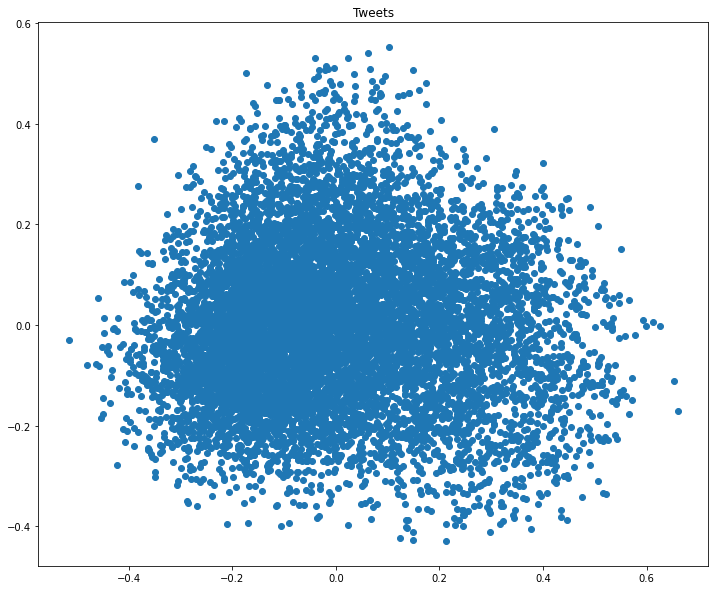

In [ ]:
# opitonal: using PCA visualization
from sklearn.decomposition import PCA #Grab PCA functions
# fit a 2d PCA model to the vectors
X = model[model.wv.vocab]
pca = PCA(n_components=2)
result = pca.fit_transform(X)
# create a plot of the projection
fig, ax = plt.subplots(figsize=(12, 10))
ax.plot(result[:, 0], result[:, 1], 'o')
ax.set_title('Tweets')
plt.show()

In [53]:
model['election']

array([-0.08142149, -0.10454169, -0.04405127,  0.13398972, -0.00277784,
        0.16455148,  0.01707692,  0.12490966, -0.08384664,  0.02321988,
        0.10142189, -0.05322055,  0.03393658, -0.05547892, -0.05398438,
       -0.03639722,  0.02554337, -0.07661007, -0.10227132,  0.07493948,
        0.00919502, -0.07388324,  0.12921356,  0.07806422, -0.06787255,
        0.02548488,  0.09698396, -0.07246731, -0.05075571,  0.13872252,
       -0.03759016, -0.1757563 , -0.0135146 ,  0.09506347, -0.04016744,
        0.17561993, -0.1280771 , -0.26096463, -0.09096701,  0.192786  ,
       -0.02832574, -0.111952  ,  0.02236996, -0.0080822 , -0.14564969,
        0.03597193,  0.02822766, -0.13522509,  0.0493571 , -0.16694476,
        0.01554812, -0.00924013, -0.04653248,  0.16589807, -0.0789991 ,
        0.10851458, -0.10992932, -0.07229552, -0.01130299,  0.16958202,
        0.02358753,  0.254485  ,  0.00357828, -0.10743039, -0.13084516,
        0.03160987,  0.01842666, -0.17799309, -0.15202145,  0.00

In [54]:
print(model.similarity('obama', 'election'))
print(model.similarity('obama', 'bush'))
print(model.similarity('obama', 'no'))
print(model.similarity('obama', 'happy'))
print(model.similarity('sad', 'cry'))

0.3111695
0.24434073
0.2553332
0.17285177
0.26311213


In [ ]:
model.most_similar('obama')[:5]

[('obam', 0.6094504594802856),
 ('ifoundationnet', 0.5906376838684082),
 ('oba', 0.5495374202728271),
 ('associatedpress', 0.5324229001998901),
 ('washintonpost', 0.5323062539100647)]

In [ ]:
tweets_train[0]

['vice', 'president', 'tlot', 'amagi', 'tcot']

In [ ]:
tweets_val[2]

['factcheckers',
 'lie',
 'obama',
 'biden',
 'convention',
 'speech',
 'woman',
 'woman',
 'boston',
 'cbsnews',
 'cbs']

In [55]:
# Transfer learning using Google’s pre-trained model

from gensim.models import Word2Vec
 
sentences = tweets_train
 
# size option needs to be set to 300 to be the same as Google's pre-trained model
 
model_transf = Word2Vec(size = 300, window=5, min_count = 1, workers = 2)
 
model_transf.build_vocab(sentences)
 
# assign the vectors to the vocabs that are in Google's pre-trained model and your sentences defined above.
 
# lockf needs to be set to 1.0 to allow continued training.
 
#model_transf.intersect_word2vec_format('GoogleNews-vectors-negative300.bin', lockf=1.0, binary=True)
 
# continue training with you own data
 
#model_transf.train(sentences, total_examples=len(sentences), epochs = 5)

In [56]:
model_transf['election']

array([-8.3000422e-04, -8.4717496e-04,  1.4219341e-03, -1.3388796e-03,
        7.9111796e-04,  1.3410257e-03, -8.1892451e-04, -1.0660398e-03,
       -8.6651277e-04,  1.1685556e-03, -8.8585803e-04,  9.1359939e-04,
        1.2015189e-03,  2.0797813e-04, -3.6651012e-04, -7.5085636e-04,
        1.1857887e-03, -1.0425766e-03,  2.8812963e-05,  7.1218261e-04,
       -1.2674656e-03,  5.6886743e-04,  2.5100776e-04, -1.5558649e-03,
       -2.9044662e-04, -1.6375824e-03,  6.1393750e-04,  7.1463532e-05,
       -7.7322766e-04,  1.4883321e-03,  4.8147532e-04, -6.5502519e-04,
        4.2109084e-04,  9.8132854e-04,  1.0484072e-03,  3.1625002e-04,
       -1.4539440e-03, -9.9030469e-05, -8.5836725e-04, -6.8169815e-04,
        1.0666236e-03,  1.5367632e-04, -1.5693376e-03, -8.7125669e-04,
        1.3394631e-03, -1.2851049e-03, -1.3826093e-04, -7.4845291e-04,
       -1.7632668e-05, -4.2341929e-04,  9.3195628e-04,  9.0235891e-04,
       -6.2510306e-05, -1.3921830e-03,  9.5667061e-04,  5.8886188e-05,
      

In [57]:
print(model_transf.similarity('obama', 'election'))
print(model_transf.similarity('obama', 'bush'))
print(model_transf.similarity('obama', 'no'))
print(model_transf.similarity('obama', 'happy'))
print(model_transf.similarity('sad', 'cry'))

-0.0076136123
-0.04131726
-0.04072329
0.014677807
0.0007413221


In [58]:
model_transf.most_similar('obama')[:5]

[('haben', 0.22482198476791382),
 ('in', 0.21519997715950012),
 ('steviejwest', 0.21265651285648346),
 ('bmwusa', 0.2093934714794159),
 ('lanou', 0.2090398371219635)]

In [59]:
print(model_transf)

Word2Vec(vocab=37546, size=300, alpha=0.025)


In [60]:
# extract all vectors
X = model_transf[model_transf.wv.vocab]

X.shape

(37546, 300)

In [61]:
import umap

cluster_embedding = umap.UMAP(n_neighbors=30, min_dist=0.0,
                              n_components=2, random_state=42).fit_transform(X)

plt.figure(figsize=(10,9))
plt.scatter(cluster_embedding[:, 0], cluster_embedding[:, 1], s=3, cmap='Spectral')

KeyboardInterrupt: ignored

## SENTENCE ENCODING

In [62]:
import pandas as pd
import numpy as np
import random
from tqdm import tqdm
import smart_open
import gensim
smart_open.open = smart_open.smart_open
import matplotlib.pyplot as plt
%matplotlib inline

import warnings;
warnings.filterwarnings('ignore')

In [ ]:
!pip install umap-learn

     |████████████████████████████████| 86 kB 3.1 MB/s 
     |████████████████████████████████| 1.1 MB 13.9 MB/s 
  Created wheel for umap-learn: filename=umap_learn-0.5.2-py3-none-any.whl size=82709 sha256=8ebb654910a93276cac146b942483ead1114c772d03f0ea625502e65306275e5
  Stored in directory: /root/.cache/pip/wheels/84/1b/c6/aaf68a748122632967cef4dffef68224eb16798b6793257d82
  Created wheel for pynndescent: filename=pynndescent-0.5.5-py3-none-any.whl size=52603 sha256=8c8b59fb30e570c10976291df107e799bc69a8bebb3c23979a672c1341259da6
  Stored in directory: /root/.cache/pip/wheels/af/e9/33/04db1436df0757c42fda8ea6796d7a8586e23c85fac355f476
Successfully built umap-learn pynndescent


### Using BERT

In [63]:
!pip install sentence-transformers

     |████████████████████████████████| 78 kB 2.7 MB/s 
     |████████████████████████████████| 3.4 MB 35.5 MB/s 
     |████████████████████████████████| 6.8 MB 29.9 MB/s 
     |████████████████████████████████| 1.2 MB 38.6 MB/s 
     |████████████████████████████████| 61 kB 232 kB/s 
     |████████████████████████████████| 596 kB 45.3 MB/s 
     |████████████████████████████████| 3.3 MB 40.9 MB/s 
     |████████████████████████████████| 895 kB 56.4 MB/s 
  Created wheel for sentence-transformers: filename=sentence_transformers-2.1.0-py3-none-any.whl size=121000 sha256=2c44fab3d6918e149619969520d6a329ce5dbc51f9dbe7edc0d7243d0a0c2150
  Stored in directory: /root/.cache/pip/wheels/90/f0/bb/ed1add84da70092ea526466eadc2bfb197c4bcb8d4fa5f7bad
Successfully built sentence-transformers
  Attempting uninstall: pyyaml
    Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13


In [64]:
from sentence_transformers import SentenceTransformer
sbert_model = SentenceTransformer('bert-base-nli-mean-tokens')

Downloading:   0%|          | 0.00/391 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/3.95k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/2.00 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/625 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/122 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/229 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/438M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/112 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/466k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/399 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/232k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/190 [00:00<?, ?B/s]

In [65]:
acc_names = []
acc_encods = []

for idx in tqdm(range(0,len(df_clean[['text_clean']].iloc[0:10000]))):
#for idx in tqdm(range(0,len(df_clean[['text_clean']]))):
  text_tmp = df_clean[['text_clean']].values[idx][0]
  text_encoded_tmp = sbert_model.encode( text_tmp )
  acc_names.append(text_tmp)
  acc_encods.append(text_encoded_tmp)

100%|██████████| 10000/10000 [20:56<00:00,  7.96it/s]


In [ ]:
df_encods = pd.DataFrame({'Text': acc_names, 'Encoded': acc_encods})
df_encods

,Text,Encoded
0,daily thedailywhat,"[0.05696607, -0.09011656, 2.0193057, -0.009164635, -0.07725236, 0.09829953, 0.15756714, 0.88966656, -0.39758408, -0.5132463, -0.5704971, 0.90871495, 0.4246991, 0.20379665, 0.34778398, 0.13697898, 0.08188024, -0.43827108, -0.03374809, -1.3622003, -0.22304407, 0.09348981, 0.9557619, -0.3904707, -0.17000878, -0.9830312, -0.4658806, -1.485486, -0.678604, 0.52104914, -0.6812198, -0.22577631, 0.60770655, -0.03198819, 0.6961357, 0.61672443, -0.24064508, 0.17610188, 0.016659275, -0.7430298, 1.8812405, -0.30292237, 0.19982058, -0.2210668, -0.8755235, 0.92058814, 0.282487, -0.9403522, 0.56193995, -1.7624125, -0.635886, 0.3968111, 0.26839808, 0.32132095, -0.68902993, 0.36063242, 0.21010937, -0.3622344, 0.13293418, 1.3978997, 0.3500405, -0.4105781, -0.5074843, 1.2440696, -0.7045032, 0.008992789, 0.51992786, 0.50378263, -0.7940467, -0.4299076, 0.32073027, -0.514225, -0.18414553, 0.3208739, -1.0836302, -0.25022504, 0.29624656, 0.5999978, -0.29805446, 0.19338286, 0.97357905, -0.23763005, 1.1919564, -0.13255793, -0.6787935, -0.08788572, 0.009952052, -1.0194553, -0.9798608, 0.9061571, 0.4910039, 0.42943788, 1.3798281, 0.6176046, -1.0000631, 0.08308451, -0.52791905, -0.06026774, 0.23436975, -0.037909724, ...]"
1,percentage web visits mobile phone usa world advanced telecom services,"[-0.078908436, 0.8865366, 0.6602791, 0.23110813, 0.45677772, -0.72078055, 0.63414156, 0.6167627, 0.29573867, -0.51692635, 0.0057918276, 0.3679252, 0.16183923, -0.005611453, 0.023721574, 0.28535378, -0.21700138, 0.7341931, 0.1652961, -0.7460398, -1.2614893, -0.04614727, 0.528665, -0.31484255, 0.82314116, 0.85013145, -0.15549035, -0.110076435, -0.7199711, 0.50947815, -0.37183943, -0.1758158, -0.24053527, -0.5198589, 0.54571456, -0.28631413, -0.49984446, -0.093772866, -0.24542661, 0.28914753, -0.0877097, -0.548694, 0.97938037, 0.29130828, -0.9173823, 0.21049167, -1.1174905, 1.1392688, -0.21690333, -0.59178233, 0.4512992, 0.16476373, 0.10573721, 0.75197905, 0.12119744, 0.9933872, 0.48407602, -0.6806517, -0.004373086, -0.6435489, -0.8437368, 0.32982787, 0.123101026, 0.051997963, -0.037055902, 0.059712213, 0.8246472, 0.45579317, -1.0391023, -0.44014606, 0.94305676, -1.4241611, -0.76682884, 0.5137827, -0.46812674, -0.7449623, -0.17918046, 1.0014514, 1.7106854, -0.523857, -0.31662533, -0.24867772, 0.21594088, -0.037115052, -0.022887865, 0.31279334, 0.05634265, -0.09357778, -0.60393375, 0.63537854, 0.34919986, -0.16037306, 0.4609965, 0.032690004, -0.12017956, 0.08018125, -0.3200105, -0.43698394, -0.21657373, 0.5177364, ...]"
2,van duzer foundation wellrepresented scott van duzer obama gets lift trail,"[0.010230418, 0.4836341, 0.6580769, 0.27609512, 0.49628174, -0.7286711, -0.15038708, -0.08116589, -0.0015306853, -0.65500605, 0.034165334, 0.38912404, 0.56451213, 0.20931356, 0.039733402, 0.59085906, -0.6391292, -0.18663335, 0.1959415, -0.6397243, -0.7590248, -1.2064568, 0.46134076, 0.21213973, 1.0795166, -0.1614404, 0.04326811, -1.5552828, -0.8855983, 0.5976975, -0.35627443, 0.31933844, 0.27397078, -0.4502872, 0.11575082, 1.2097529, -0.16183703, -0.2643661, 0.39923927, -0.62717545, 0.9079343, -0.5458441, 0.6554779, -0.1632849, -1.2349324, -0.38808128, -0.27676594, 0.21739355, 0.5964665, -1.6228989, 0.11331166, 0.35672677, -0.48444197, 0.12498483, 0.12897271, -0.08792736, 0.62584746, -1.0136439, 0.120312996, -0.38848883, -0.16972014, -0.07249699, 0.30143678, 0.5777251, -0.49347958, -0.27012768, 0.12751208, 0.28889695, -1.155325, -0.34415254, 0.0073339874, -0.48171002, -0.33336902, -0.11061147, -0.16739267, -0.521321, -0.0353238, 0.6564969, 1.0991589, 0.60875493, 0.3254244, 0.42370236, -0.38760525, 0.36497742, -0.5394219, 1.3666677, 0.4778007, 0.10920012, -1.2318629, -0.22452419, 0.37029567, -0.13673966, 0.66765034, -0.016569667, -0.5026399, -0.27337396, 0.47349077, -0.9787891, -0.007720081, -0.2273471, ...]"
3,comes worst preelection smear campaign,"[-0.14748995, 1.0055926, 0.9051428, 0.15625025, -0.22725976, 0.8235022, 1.342921, 0.54384935, 

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np
# put all sentence embeddings in a matrix
embed_mat = np.array([x for x in df_encods["Encoded"]])
# calculate distance between every embedding pair
sim_mat = cosine_similarity(embed_mat,embed_mat)
#get sim score for a given sentence at position df.iloc[sentence_id]
sentence_id = 2
print("Similarities for Sentence : " + df_encods.iloc[sentence_id].Text)
# write sim scores to df
df_encods['sim_score'] = sim_mat[sentence_id]
df_encods.sort_values('sim_score', ascending = False)

In [ ]:
XX = np.stack( df_encods["Encoded"].values, axis=0 )

In [ ]:
XX.shape

(10000, 768)

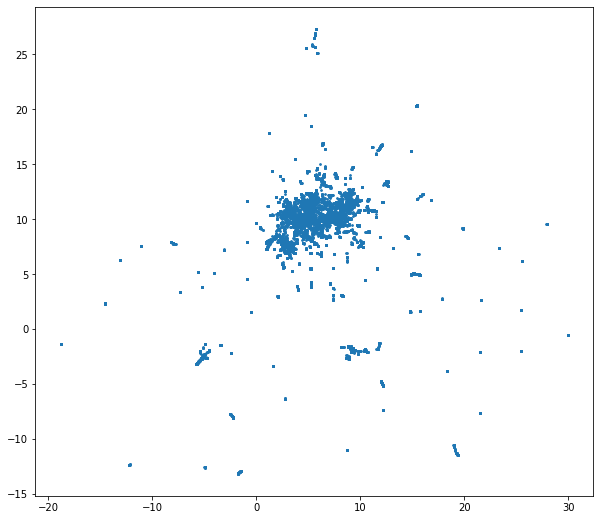

In [ ]:
import umap

cluster_embedding = umap.UMAP(n_neighbors=30, min_dist=0.0,
                              n_components=2, random_state=42).fit_transform(XX)

plt.figure(figsize=(10,9))
plt.scatter(cluster_embedding[:, 0], cluster_embedding[:, 1], s=3, cmap='Spectral')

### Using Word2Vec

In [ ]:
import nltk
nltk.download('punkt')
from nltk.tokenize import word_tokenize
import numpy as np

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [ ]:
sentences = df_clean[['text_clean']].iloc[0:10000].values.ravel().tolist()
sentences

['daily thedailywhat',
 'percentage web visits mobile phone usa world advanced telecom services',
 'van duzer foundation wellrepresented scott van duzer obama gets lift trail',
 'comes worst preelection smear campaign',
 'anniversary marked cloud health problems funding fights',
 'americanlatino fyi natl public lands day feefree day staplanning visit national park',
 'reasons vote united kingdom independence party ukip general election united kingdom',
 'obama gaffes claims proud words usa',
 'tpohisself north carolina democrat vote repeal obamacare endorse obama',
 'emadair michigan democrats union scam millions handicapped kids reelect obama romneyryan t',
 'new article video september obama ryan plouffe follow twptweets',
 'video september obama ryan plouffe september pm excerpts scott pelleys interview',
 'iraqs fugitive vp given death sentence dec file photo iraqs sunni vice president tariq al',
 'general election economy polls hung parliament possibility th general',
 'surprise d

In [ ]:
# Tokenization of each document
tokenized_sent = []
for s in sentences:
    tokenized_sent.append(word_tokenize(s.lower()))
tokenized_sent

[['daily', 'thedailywhat'],
 ['percentage',
  'web',
  'visits',
  'mobile',
  'phone',
  'usa',
  'world',
  'advanced',
  'telecom',
  'services'],
 ['van',
  'duzer',
  'foundation',
  'wellrepresented',
  'scott',
  'van',
  'duzer',
  'obama',
  'gets',
  'lift',
  'trail'],
 ['comes', 'worst', 'preelection', 'smear', 'campaign'],
 ['anniversary', 'marked', 'cloud', 'health', 'problems', 'funding', 'fights'],
 ['americanlatino',
  'fyi',
  'natl',
  'public',
  'lands',
  'day',
  'feefree',
  'day',
  'staplanning',
  'visit',
  'national',
  'park'],
 ['reasons',
  'vote',
  'united',
  'kingdom',
  'independence',
  'party',
  'ukip',
  'general',
  'election',
  'united',
  'kingdom'],
 ['obama', 'gaffes', 'claims', 'proud', 'words', 'usa'],
 ['tpohisself',
  'north',
  'carolina',
  'democrat',
  'vote',
  'repeal',
  'obamacare',
  'endorse',
  'obama'],
 ['emadair',
  'michigan',
  'democrats',
  'union',
  'scam',
  'millions',
  'handicapped',
  'kids',
  'reelect',
  'ob

In [ ]:
from gensim.models.doc2vec import Doc2Vec, TaggedDocument
tagged_data = [TaggedDocument(d, [i]) for i, d in enumerate(tokenized_sent)]
tagged_data

[TaggedDocument(words=['daily', 'thedailywhat'], tags=[0]),
 TaggedDocument(words=['percentage', 'web', 'visits', 'mobile', 'phone', 'usa', 'world', 'advanced', 'telecom', 'services'], tags=[1]),
 TaggedDocument(words=['van', 'duzer', 'foundation', 'wellrepresented', 'scott', 'van', 'duzer', 'obama', 'gets', 'lift', 'trail'], tags=[2]),
 TaggedDocument(words=['comes', 'worst', 'preelection', 'smear', 'campaign'], tags=[3]),
 TaggedDocument(words=['anniversary', 'marked', 'cloud', 'health', 'problems', 'funding', 'fights'], tags=[4]),
 TaggedDocument(words=['americanlatino', 'fyi', 'natl', 'public', 'lands', 'day', 'feefree', 'day', 'staplanning', 'visit', 'national', 'park'], tags=[5]),
 TaggedDocument(words=['reasons', 'vote', 'united', 'kingdom', 'independence', 'party', 'ukip', 'general', 'election', 'united', 'kingdom'], tags=[6]),
 TaggedDocument(words=['obama', 'gaffes', 'claims', 'proud', 'words', 'usa'], tags=[7]),
 TaggedDocument(words=['tpohisself', 'north', 'carolina', 'demo

In [ ]:
## Train doc2vec model
model = Doc2Vec(tagged_data, vector_size = 100, window = 2, min_count = 1, epochs = 100)

## Print model vocabulary
model.wv.vocab

{'daily': <gensim.models.keyedvectors.Vocab at 0x7f3a6df96d50>,
 'thedailywhat': <gensim.models.keyedvectors.Vocab at 0x7f3a6df96790>,
 'percentage': <gensim.models.keyedvectors.Vocab at 0x7f3a6df96c50>,
 'web': <gensim.models.keyedvectors.Vocab at 0x7f3a6df963d0>,
 'visits': <gensim.models.keyedvectors.Vocab at 0x7f3a6df96710>,
 'mobile': <gensim.models.keyedvectors.Vocab at 0x7f3a6df96dd0>,
 'phone': <gensim.models.keyedvectors.Vocab at 0x7f3a6df96590>,
 'usa': <gensim.models.keyedvectors.Vocab at 0x7f3a6df96b10>,
 'world': <gensim.models.keyedvectors.Vocab at 0x7f3a6df96b50>,
 'advanced': <gensim.models.keyedvectors.Vocab at 0x7f3a6df96b90>,
 'telecom': <gensim.models.keyedvectors.Vocab at 0x7f3a6df96910>,
 'services': <gensim.models.keyedvectors.Vocab at 0x7f3a6df968d0>,
 'van': <gensim.models.keyedvectors.Vocab at 0x7f3a6df96810>,
 'duzer': <gensim.models.keyedvectors.Vocab at 0x7f3a6df96a50>,
 'foundation': <gensim.models.keyedvectors.Vocab at 0x7f3a6df981d0>,
 'wellrepresented':

In [ ]:
#test_doc = word_tokenize(sentences[0].lower())
#test_doc_vector = model.infer_vector(test_doc)
#model.docvecs.most_similar(positive = [test_doc_vector])

In [ ]:
acc_names = []
acc_encods = []

for idx in tqdm(range(0,len(df_clean[['text_clean']].iloc[0:10000]))):
#for idx in tqdm(range(0,len(df_clean[['text_clean']]))):
  text_tmp = df_clean[['text_clean']].values[idx][0]
  text_encoded_tmp = model.infer_vector( word_tokenize(text_tmp) )
  acc_names.append(text_tmp)
  acc_encods.append(text_encoded_tmp)

100%|██████████| 10000/10000 [00:57<00:00, 174.24it/s]


In [ ]:
df_encods = pd.DataFrame({'Text': acc_names, 'Encoded': acc_encods})
df_encods

,Text,Encoded
0,daily thedailywhat,"[0.20117256, 0.0056931535, -0.01943125, 0.078445956, -0.083193615, 0.202805, 0.15872434, 0.06571909, -0.16388777, -0.13964637, -0.15137286, -0.1411493, -0.22070101, -0.1902748, 0.031817712, -0.011607265, -0.017315237, 0.08737237, 0.013559518, -0.0051941723, -0.07659785, -0.022668047, -0.12642458, -0.1308013, -0.17741384, 0.06991045, 0.0214163, -0.26749346, -0.0686116, 0.014968269, 0.17642055, 0.029015915, 0.06912275, -0.08963085, 0.070497975, 0.04164287, 0.11834902, 0.23892666, -0.024896344, -0.09015337, -0.3277638, 0.060035035, 0.18594913, -0.1579675, 0.08021652, 0.016582416, 0.20331433, -0.02435858, -0.027023861, 0.11585541, 0.026879024, 0.03614547, 0.009335272, 0.008217845, 0.10152434, -0.11440278, 0.15355565, -0.095365964, 0.12237841, -0.11970483, -0.10013539, -0.1089665, -0.026822347, 0.14637801, 0.10850021, 0.16365795, 0.0005672445, 0.049730677, 0.06360359, -0.03994478, -0.007729802, 0.1436742, 0.013508598, -0.130335, 0.16422781, 0.021480177, 0.10381355, -0.08258772, 0.040610995, 0.0567878, -0.27844778, 0.03496696, 0.1361188, -0.0012177293, -0.04343684, -0.1486338, 0.19520943, -0.1404173, -0.11536116, 0.17110781, -0.1662722, 0.16731592, -0.08896802, -0.16754268, -0.22017789, -0.15357031, 0.073296, 0.06257312, -0.019988911, 0.09494852]"
1,percentage web visits mobile phone usa world advanced telecom services,"[0.16451782, 0.3844153, -0.03352253, -0.43168038, 0.19251454, 0.084446914, 0.047433883, -0.042742655, 0.065917686, 0.15149504, -0.124442, -0.47651288, 0.034187343, 0.40976256, 0.14518897, 0.53489983, 0.119357124, -0.2864075, 0.11697844, 0.11927781, -0.21654195, 0.32940456, -0.49663565, 0.52979565, -0.815704, 0.21823719, -0.30711874, -0.1477749, 0.640665, 0.42164096, 0.17584652, 0.23502582, 0.52135754, -0.077977315, -0.25855985, -0.53749084, 0.6934168, 0.2844821, -0.25799865, -0.1871377, -0.48218927, 0.15404344, 0.41808733, -0.0072641084, -0.06223947, -0.15029092, 0.36552057, 0.10774171, -0.36748636, -0.0925943, -0.18012786, 0.19333854, -0.29464713, -0.17862728, 0.17997721, 0.30547318, -0.20197839, -0.13843933, 0.34081337, -0.40569782, -0.18553236, -0.29285923, 0.3077693, 0.6527835, 0.18545018, 0.37622908, -0.051728345, 0.3550885, -0.02541435, -0.7321718, -0.083797954, 0.22070767, 0.40332717, -0.22344896, -0.6754626, -0.05789632, 0.32683414, -0.14043312, 0.47982424, 0.22902916, -0.4862584, 0.28647417, -0.081351414, -0.6087913, -0.15261497, -0.30114102, 0.043656673, -0.3398544, -0.52437687, 0.09599222, -0.09543984, -0.06294711, 0.18194845, 0.24833365, -0.1981499, 0.60969776, -0.21722597, 0.22780083, -0.035606395, 0.39123675]"
2,van duzer foundation wellrepresented scott van duzer obama gets lift trail,"[-0.067092694, -0.14719987, -0.10786937, -0.02238467, -0.06214398, -0.04109423, 0.1396135, 0.34140125, 0.17922646, -0.105226845, 0.16937156, 0.022254292, 0.14072964, 0.17870657, -0.1705779, 0.073138624, 0.009499694, 0.05898784, -0.03427293, -0.15226702, -0.09071554, -0.11003708, -0.055725887, -0.00061471766, 0.04295196, -0.09836977, 0.13038184, 0.09404499, -0.07364347, -0.102576755, 0.2159102, -0.031204902, -0.021808323, -0.10358106, 0.106712505, -0.20595965, 0.0708051, 0.048860196, 0.18975693, 0.13393845, -0.001568244, -0.018856822, 0.33716083, 0.03641845, -0.00018569306, 0.27383447, 0.024809834, -0.041484665, -0.16110983, 0.19385622, 0.054336198, -0.025092695, 0.06431809, 0.14035676, -0.020787032, 0.011566029, 0.12327525, 0.1479865, -0.118954614, -0.05368858, 0.060681943, 0.0121120075, -0.0987204, 0.020037623, 0.019268269, 0.15452117, -0.0037308484, -0.22260292, -0.07997259, 0.1346921, 0.16238366, 0.11895392, -0.23635577, -0.15558802, 0.14656803, 0.11324399, 0.30026037, 0.2743947, 0.042474896, -0.2579058, -0.0033174306, 0.14102902, 0.33026487, 0.14706635, -0.14186372, 8.059047e-08, 0.0026009502, -0.13214646, 0.010320555, -0.06783783, -0.034892116, 0.12067705, 0.13949315, 0.086971335, -0.09678022, -0.02752955, -0.06377406, -0.050287742, 0.20316789, -0.1715244]"
3,comes worst preelecti

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np
# put all sentence embeddings in a matrix
embed_mat = np.array([x for x in df_encods["Encoded"]])
# calculate distance between every embedding pair
sim_mat = cosine_similarity(embed_mat,embed_mat)
#get sim score for a given sentence at position df.iloc[sentence_id]
sentence_id = 1
print("Similarities for Sentence : " + df_encods.iloc[sentence_id].Text)
# write sim scores to df
df_encods['sim_score'] = sim_mat[sentence_id]
df_encods.sort_values('sim_score', ascending = False)

Similarities for Sentence : percentage web visits mobile phone usa world advanced telecom services


,Text,Encoded,sim_score
1,percentage web visits mobile phone usa world advanced telecom services,"[0.16451782, 0.3844153, -0.03352253, -0.43168038, 0.19251454, 0.084446914, 0.047433883, -0.042742655, 0.065917686, 0.15149504, -0.124442, -0.47651288, 0.034187343, 0.40976256, 0.14518897, 0.53489983, 0.119357124, -0.2864075, 0.11697844, 0.11927781, -0.21654195, 0.32940456, -0.49663565, 0.52979565, -0.815704, 0.21823719, -0.30711874, -0.1477749, 0.640665, 0.42164096, 0.17584652, 0.23502582, 0.52135754, -0.077977315, -0.25855985, -0.53749084, 0.6934168, 0.2844821, -0.25799865, -0.1871377, -0.48218927, 0.15404344, 0.41808733, -0.0072641084, -0.06223947, -0.15029092, 0.36552057, 0.10774171, -0.36748636, -0.0925943, -0.18012786, 0.19333854, -0.29464713, -0.17862728, 0.17997721, 0.30547318, -0.20197839, -0.13843933, 0.34081337, -0.40569782, -0.18553236, -0.29285923, 0.3077693, 0.6527835, 0.18545018, 0.37622908, -0.051728345, 0.3550885, -0.02541435, -0.7321718, -0.083797954, 0.22070767, 0.40332717, -0.22344896, -0.6754626, -0.05789632, 0.32683414, -0.14043312, 0.47982424, 0.22902916, -0.4862584, 0.28647417, -0.081351414, -0.6087913, -0.15261497, -0.30114102, 0.043656673, -0.3398544, -0.52437687, 0.09599222, -0.09543984, -0.06294711, 0.18194845, 0.24833365, -0.1981499, 0.60969776, -0.21722597, 0.22780083, -0.035606395, 0.39123675]",1.000000
3910,usa today early laptop designer moggridge dies world news,"[0.2771184, -0.019666906, 0.07246542, 0.07887631, -0.14705469, 0.28740662, 0.20236735, -0.34133855, 0.025740804, -0.32453096, -0.03213496, -0.33129516, -0.32854432, -0.17705658, -0.1366533, 0.06072451, -0.14502999, 0.15713145, 0.33596304, 0.03939761, 0.039230596, -0.05959369, -0.40512395, 0.27502593, -0.4996949, 0.32079035, -0.43130195, -0.43014216, 0.048633244, 0.0016406736, 0.2719225, 0.1579015, 0.12926947, -0.021773292, -0.12307007, -0.27134368, 0.68858767, 0.1967686, 0.045565534, -0.29578248, -0.1293959, 0.17194843, 0.31119522, -0.19848603, 0.083095655, -0.039069615, 0.3094414, -0.1796487, -0.08732583, 0.031006437, -0.27676, 0.010340736, -0.04654332, -0.29048872, -0.3328127, 0.19348413, 0.21286228, -0.1819849, 0.36796176, -0.4299771, 0.038916484, -0.3758982, -0.14652215, 0.3150328, 0.02628746, 0.30192614, -0.15527865, 0.10027054, 0.1834408, -0.46996695, -0.1117103, -0.15880495, 0.38116342, -0.2901998, -0.14118707, -0.14546224, 0.438572, 0.06541165, 0.33793488, -0.16090345, -0.45624346, 0.03093977, 0.32689357, -0.57195514, 0.010179774, -0.29218304, 0.018957095, -0.122307844, -0.055092525, 0.035470594, -0.17835513, -0.04663752, -0.00907788, -0.22499861, 0.0052043498, -0.06565621, 0.054016195, 0.32887554, 0.0633391, 0.20247874]",0.600094
6657,mobeadat fahedinad madaba like mobeadat amman world jo usa yup amazinghighly recommend,"[0.43610007, 0.025950832, -0.22760722, 0.05315329, -0.22631803, 0.17757392, 0.52235013, -0.3812862, -0.28117234, 0.12501538, -0.2144369, -0.4775189, -0.5910421, 0.097071305, -0.1388951, -0.16096947, -0.07378152, 0.07555327, 0.35988346, 0.31248152, -0.3825499, 0.11506728, -0.6542036, 0.46504232, -0.60747206, 0.6557915, -0.42178333, -0.32564163, 0.13161267, 0.064313516, 0.72424835, 0.27724978, 0.14261372, -0.077856235, 0.2116205, -0.3743783, 0.43549362, 0.37777808, -0.18644892, 0.38108587, -0.2875433, -0.03203706, 0.16159427, -0.48512837, -0.15726589, 0.18155344, 0.32843706, -0.048678644, 0.20916195, -0.25604922, -0.25323662, -0.058700945, -0.075493835, 0.051466756, 0.10991676, -0.46129543, 0.28190786, -0.3285467, 0.061396994, -0.38044626, -0.21327034, -0.9171477, -0.27087402, 0.742503, -0.26583353, 0.26726514, -0.48397467, -0.12685962, -0.29776624, -0.6106558, 0.14320251, 0.39205492, 0.46581867, -0.083888106, -0.33385694, 0.27792946, 0.5441587, 0.56734973, 0.04761873, 0.003126338, -0.1413631, -0.16222608, 0.56077075, -0.7233151, 0.41172102, -0.47258663, 0.26017833, -0.032102413, -0.86617893, 0.01567839, -0.010407602, 0.09505674, 0.14914234, -0.17300189, -0.74638045, 0.5453359, -0.0698823, 0.4099212, -0.47823295, 0.

In [ ]:
XX = np.stack( df_encods["Encoded"].values, axis=0 )

In [ ]:
XX.shape

(10000, 100)

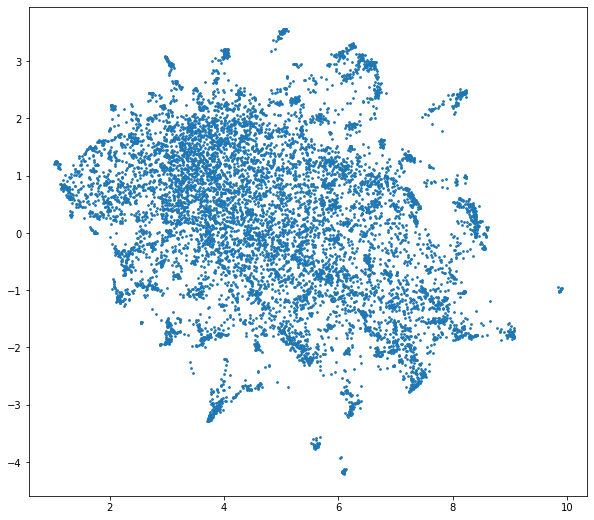

In [ ]:
import umap

cluster_embedding = umap.UMAP(n_neighbors=30, min_dist=0.0,
                              n_components=2, random_state=42).fit_transform(XX)

plt.figure(figsize=(10,9))
plt.scatter(cluster_embedding[:, 0], cluster_embedding[:, 1], s=3, cmap='Spectral')

### Using Universal Sentence Encoder

In [ ]:
#!pip3 install --upgrade tensorflow-gpu
# Install TF-Hub.
#!pip3 install tensorflow-hub

In [66]:
import tensorflow as tf
import tensorflow_hub as hub
import numpy as np

In [67]:
module_url = "https://tfhub.dev/google/universal-sentence-encoder/4" 
model = hub.load(module_url)
print ("module %s loaded" % module_url)

INFO:absl:Using /tmp/tfhub_modules to cache modules.
INFO:absl:Downloading TF-Hub Module 'https://tfhub.dev/google/universal-sentence-encoder/4'.
INFO:absl:Downloading https://tfhub.dev/google/universal-sentence-encoder/4: 900.00MB
INFO:absl:Downloaded https://tfhub.dev/google/universal-sentence-encoder/4, Total size: 987.47MB
INFO:absl:Downloaded TF-Hub Module 'https://tfhub.dev/google/universal-sentence-encoder/4'.


module https://tfhub.dev/google/universal-sentence-encoder/4 loaded


In [ ]:
#sentence_embeddings = model(sentences)
#query = "I had pizza and pasta"
#query_vec = model([query])[0]
#query_vec.numpy()

In [68]:
acc_names = []
acc_encods = []

for idx in tqdm(range(0,len(df_clean[['text_clean']].iloc[0:30000]))):
#for idx in tqdm(range(0,len(df_clean[['text_clean']]))):
  text_tmp = df_clean[['text_clean']].values[idx][0]
  text_encoded_tmp = model([text_tmp])[0].numpy()
  acc_names.append(text_tmp)
  acc_encods.append(text_encoded_tmp)

100%|██████████| 30000/30000 [04:28<00:00, 111.93it/s]


In [69]:
df_encods = pd.DataFrame({'Text': acc_names, 'Encoded': acc_encods})
df_encods

,Text,Encoded
0,daily thedailywhat,"[-0.00015443022, 0.001659024, -0.021159614, -0.02483471, 0.0919217, 0.049960684, -0.04361972, 0.033487156, -0.0073757176, 0.053163487, -0.02268309, -0.0058773807, -0.08344221, 0.0119875055, 0.04291556, -0.037794083, -0.001154166, 0.045799576, -0.020953404, 0.03414223, 0.007456385, 0.028847165, 0.02145265, -0.025454652, 0.013892566, -0.0024135876, 0.05769073, -0.069187365, -0.041048158, 0.059869327, 0.0097973645, 0.04130027, 0.010767112, 0.03593114, -0.08119549, 0.042077694, -0.027757753, -0.04315337, -0.015476184, -0.052610915, 0.0111151915, 0.06527645, 0.033262935, -0.09165734, -0.0325634, -0.0046503707, -0.08223759, 0.03648869, 0.05787093, 0.0003663156, 0.019946028, 0.051034153, 0.07652894, -0.025517615, -0.0068909083, -0.0073267086, -0.0041079037, -0.008104169, 0.07397441, -0.006161028, -0.013470217, -0.002254936, -0.0013605356, 0.040905025, -0.023537124, 0.018058462, 0.043094635, -0.07879041, -0.01194062, -0.050830238, -0.07251029, -0.10323676, 0.026702106, 0.040256005, -0.031015743, 0.04161056, 0.0033512414, -0.034942035, -0.023153067, -0.020532113, -0.038255993, -0.0023047477, -0.08034092, 0.024434678, -0.06684527, -0.017682733, 0.05317074, 0.035675198, 0.013517812, -0.09291821, 0.023104377, 0.03983405, 0.016908603, -0.003822218, -0.019287504, -0.040752865, 0.003750234, 0.03385379, -0.055078465, 0.029983591, ...]"
1,percentage web visits mobile phone usa world advanced telecom services,"[0.024602305, 0.051061846, -0.05863532, 0.04293455, -0.07399731, -0.08428066, 0.041372817, -0.00071716565, -0.03787613, -0.012040856, -0.020930976, 0.059123483, -0.011314968, -0.047112152, 0.05657949, -0.01010097, -0.03732165, -0.021243157, 0.04650614, -0.038287494, -0.02487106, 0.035788085, -0.027793359, 0.065944314, 0.003064925, 0.079088494, 0.04136368, 0.0087912, 0.025896486, -0.05718264, 0.017485475, -0.03798471, 0.03525836, -0.0140550025, -0.025785526, 0.06445338, -0.060753793, 0.030589713, -0.006247835, 0.045346398, 0.08671513, -0.022759663, -0.05378129, -0.056475937, 0.07114778, 0.020136524, 0.003100642, 0.007084208, 0.016111512, -0.0069703218, -0.044148937, 0.051633548, -0.0036565694, 0.025571117, -0.01180786, -0.022831555, 0.053371698, 0.04562368, -0.06168496, 0.049614362, -0.0072878045, -0.009617852, 0.037438888, 0.013722092, -0.0123129655, 0.046352968, 0.040666938, 0.010376556, -0.04562342, 0.020322543, -0.03367633, 0.012414926, -0.017435225, 0.027346734, -0.03734055, 0.019306516, 0.06707462, -0.06456279, -0.051150154, 0.013209838, 0.040679943, -0.004614284, -0.040900122, 0.07900693, -0.0032888404, 0.00036404093, 0.0053172964, -0.011229007, -0.038657732, 0.03482034, 0.023934664, 0.024110442, 0.047085688, -0.033377785, -0.027567664, -0.057190444, 0.0770401, 0.05078056, -0.037336905, 0.01865706, ...]"
2,van duzer foundation wellrepresented scott van duzer obama gets lift trail,"[0.01020192, 0.045508, 0.021683654, -0.038613487, -0.026974363, 0.06746048, 0.06867351, -0.03914272, 0.004630988, 0.017151354, -0.051582012, 0.03873632, -0.021704836, -0.038186483, 0.04299453, -0.059482682, -0.055914395, 0.050008032, -0.076882705, 0.039998103, -0.028390557, -0.061836846, 0.0016606991, 0.05995863, 0.029583003, -0.06670738, -0.060595088, -0.040128127, 0.073255256, 0.019686189, -0.060159158, 0.016031303, -0.0061262436, -0.015994856, 0.04920414, 0.022421783, -0.016802048, -0.018495774, 0.011818222, -0.016416008, 0.07693611, -0.07298896, -0.05675727, -0.051196545, -0.06949107, -0.028209351, 0.020247536, -0.010808556, 0.048417587, 0.062402155, -0.077213325, -0.005600719, -0.03486097, 0.02660854, -0.023534223, 0.07611345, 0.016313449, 0.0019659111, 0.039819628, 0.08069065, 0.081539534, -0.013536049, -0.08133335, 0.042987693, -0.0009705912, 0.020527532, -0.030093981, -0.056382347, -0.00796764, 0.051855046, 0.0021531102, 0.058436837, -0.06608589, -0.034842223, -0.016399972, -0.042805195, 0.014505379, 0.050916806, -0.02154119, 0.029663783, 0.07099167, -0.033265382, 0.0018953321, 0.043837976, -0.056839142, -0.03256

In [70]:
df_encods.to_csv('tweets_encoded_USE.csv', index=False, header=True)

In [71]:
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np
# put all sentence embeddings in a matrix
embed_mat = np.array([x for x in df_encods["Encoded"]])
# calculate distance between every embedding pair
sim_mat = cosine_similarity(embed_mat,embed_mat)
#get sim score for a given sentence at position df.iloc[sentence_id]
sentence_id = 1
print("Similarities for Sentence : " + df_encods.iloc[sentence_id].Text)
# write sim scores to df
df_encods['sim_score'] = sim_mat[sentence_id]
df_encods.sort_values('sim_score', ascending = False)

Similarities for Sentence : percentage web visits mobile phone usa world advanced telecom services


,Text,Encoded,sim_score
1,percentage web visits mobile phone usa world advanced telecom services,"[0.024602305, 0.051061846, -0.05863532, 0.04293455, -0.07399731, -0.08428066, 0.041372817, -0.00071716565, -0.03787613, -0.012040856, -0.020930976, 0.059123483, -0.011314968, -0.047112152, 0.05657949, -0.01010097, -0.03732165, -0.021243157, 0.04650614, -0.038287494, -0.02487106, 0.035788085, -0.027793359, 0.065944314, 0.003064925, 0.079088494, 0.04136368, 0.0087912, 0.025896486, -0.05718264, 0.017485475, -0.03798471, 0.03525836, -0.0140550025, -0.025785526, 0.06445338, -0.060753793, 0.030589713, -0.006247835, 0.045346398, 0.08671513, -0.022759663, -0.05378129, -0.056475937, 0.07114778, 0.020136524, 0.003100642, 0.007084208, 0.016111512, -0.0069703218, -0.044148937, 0.051633548, -0.0036565694, 0.025571117, -0.01180786, -0.022831555, 0.053371698, 0.04562368, -0.06168496, 0.049614362, -0.0072878045, -0.009617852, 0.037438888, 0.013722092, -0.0123129655, 0.046352968, 0.040666938, 0.010376556, -0.04562342, 0.020322543, -0.03367633, 0.012414926, -0.017435225, 0.027346734, -0.03734055, 0.019306516, 0.06707462, -0.06456279, -0.051150154, 0.013209838, 0.040679943, -0.004614284, -0.040900122, 0.07900693, -0.0032888404, 0.00036404093, 0.0053172964, -0.011229007, -0.038657732, 0.03482034, 0.023934664, 0.024110442, 0.047085688, -0.033377785, -0.027567664, -0.057190444, 0.0770401, 0.05078056, -0.037336905, 0.01865706, ...]",1.000000
7396,phone plan contract unlimited callstextdata g nationwide pays referrals usa,"[-0.059737183, -0.04585184, -0.0019061492, 0.027852315, -0.034467515, -0.06955356, 0.08294122, -0.009671963, -0.013891082, -0.0841429, -0.06459277, 0.015329175, 0.014843251, -0.017367983, 0.03510554, -0.0060507474, 0.02061863, -0.016167099, 0.029073142, 0.010991934, -0.05958868, 0.018275548, -0.06573361, 0.05035024, -0.023690209, -0.001453509, 0.053226262, 0.042718858, 0.0010769293, -0.071661316, 0.04779654, -0.006242101, -0.07443185, 0.0043209405, -0.03601908, 0.07206947, 0.019520909, 0.018229213, 0.067590006, 0.0743057, 0.08631731, 0.012860565, -0.030095588, -0.06388746, 0.08025021, -0.048531093, 0.010757892, 0.03743237, 0.015289511, -0.042572703, -0.04829193, -0.017428938, -0.059936624, 0.03740612, -0.06974585, -0.037345145, 0.0722063, -0.00836332, -0.019677542, -0.018103087, 0.03718922, 0.03868805, -0.0026103707, -0.009636655, -0.063876316, -0.0074905865, 0.067779034, -0.016700089, 0.047151923, -0.004251177, 0.0400309, -0.011590211, -0.045783598, 0.04647873, -0.045340475, -0.005220444, 0.02437499, 0.0006785562, -0.051074665, -0.057795625, 0.081143394, -0.054325424, 0.05314179, 0.036786497, -0.03624505, -0.03232511, 0.05418733, -0.08317315, -0.04283273, 0.052198846, -0.030986385, 0.065155484, -0.030947454, 0.022711512, 0.039723642, -0.05107638, 0.07406107, 0.07258065, -0.03799915, -0.030686857, ...]",0.459384
10799,phone plan contract unlimited callstextdata g nationwide pays referrals usa,"[-0.059737183, -0.04585184, -0.0019061492, 0.027852315, -0.034467515, -0.06955356, 0.08294122, -0.009671963, -0.013891082, -0.0841429, -0.06459277, 0.015329175, 0.014843251, -0.017367983, 0.03510554, -0.0060507474, 0.02061863, -0.016167099, 0.029073142, 0.010991934, -0.05958868, 0.018275548, -0.06573361, 0.05035024, -0.023690209, -0.001453509, 0.053226262, 0.042718858, 0.0010769293, -0.071661316, 0.04779654, -0.006242101, -0.07443185, 0.0043209405, -0.03601908, 0.07206947, 0.019520909, 0.018229213, 0.067590006, 0.0743057, 0.08631731, 0.012860565, -0.030095588, -0.06388746, 0.08025021, -0.048531093, 0.010757892, 0.03743237, 0.015289511, -0.042572703, -0.04829193, -0.017428938, -0.059936624, 0.03740612, -0.06974585, -0.037345145, 0.0722063, -0.00836332, -0.019677542, -0.018103087, 0.03718922, 0.03868805, -0.0026103707, -0.009636655, -0.063876316, -0.0074905865, 0.067779034, -0.016700089, 0.047151923, -0.004251177, 0.0400309, -0.011590211, -0.045783598, 0.04647873, -0.045340475, -0.005220444, 0.02437499, 0.0006785562, -0.051074665, -0.057795625, 0.0

In [72]:
sim_mat.shape

(30000, 30000)

In [75]:
sim_mat[1,:].shape

(30000,)

In [76]:
XX = np.stack( df_encods["Encoded"].values, axis=0 )

In [77]:
XX.shape

(30000, 512)

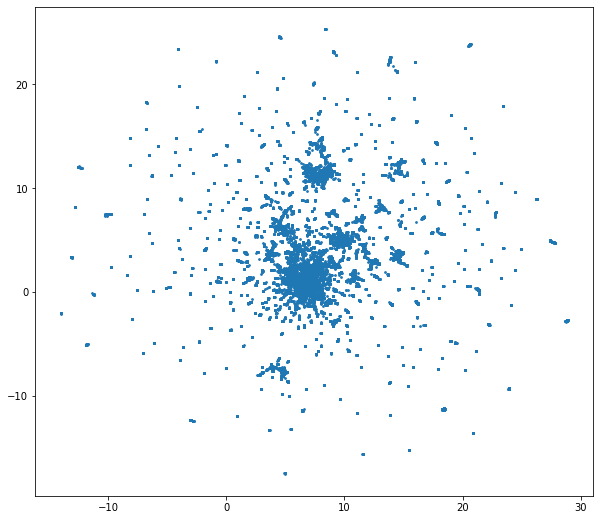

In [78]:
import umap

cluster_embedding = umap.UMAP(n_neighbors=30, min_dist=0.0,
                              n_components=2, random_state=42).fit_transform(XX)

plt.figure(figsize=(10,9))
plt.scatter(cluster_embedding[:, 0], cluster_embedding[:, 1], s=3, cmap='Spectral')

In [79]:
cluster_embedding.shape

(30000, 2)

In [80]:
cluster_embedding[0]

array([ 8.092218  , -0.28726953], dtype=float32)

In [ ]:
d

### Using InferSent

In [ ]:
! mkdir encoder
! curl -Lo encoder/infersent2.pkl https://dl.fbaipublicfiles.com/infersent/infersent2.pkl
  
! mkdir GloVe
! curl -Lo GloVe/glove.840B.300d.zip http://nlp.stanford.edu/data/glove.840B.300d.zip
! unzip GloVe/glove.840B.300d.zip -d GloVe/

mkdir: cannot create directory ‘encoder’: File exists
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  146M  100  146M    0     0  54.6M      0  0:00:02  0:00:02 --:--:-- 54.6M
mkdir: cannot create directory ‘GloVe’: File exists
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0   315    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
  0   352    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100 2075M  100 2075M    0     0  5178k      0  0:06:50  0:06:50 --:--:-- 5657k
Archive:  GloVe/glove.840B.300d.zip
replace GloVe/glove.840B.300d.txt? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [ ]:
from models import InferSent
import torch

V = 2
MODEL_PATH = 'encoder/infersent%s.pkl' % V
params_model = {'bsize': 64, 'word_emb_dim': 300, 'enc_lstm_dim': 2048,
                'pool_type': 'max', 'dpout_model': 0.0, 'version': V}
model = InferSent(params_model)
model.load_state_dict(torch.load(MODEL_PATH))

W2V_PATH = '/content/GloVe/glove.840B.300d.txt'
model.set_w2v_path(W2V_PATH)

In [ ]:
sentences = df_clean[['text_clean']].iloc[0:10000].values.ravel().tolist()
sentences

['the daily what  via thedailywhat',
 'percentage of web visits via mobile phone in usa world  advanced telecom services ',
 'the van duzer foundation is wellrepresented by scott van duzer  obama gets a lift on the trail ',
 'here comes worst preelection smear campaign yet   or',
 'anniversary of  marked under cloud of health problems funding fights ',
 'americanlatino fyi  is natl public lands day  feefree day staplanning your visit to a national park  ',
 'reasons to vote united kingdom independence party ukip  general election  the united kingdom ',
 'obama gaffes claims three proud words are made in the usa ',
 'tpohisself north carolina democrat will vote to repeal obamacare will not endorse obama  ',
 'emadair michigan democrats union scam millions from handicapped kids to reelect obama  romneyryan \nt ',
 'new article video september  obama ryan plouffe  follow twptweets ',
 'video september  obama ryan plouffe september    pm excerpts from scott pelleys interview with ',
 'iraq

In [ ]:
import nltk
nltk.download('punkt')

model.build_vocab(sentences, tokenize=True)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
Found 8697(/12212) words with w2v vectors
Vocab size : 8697


In [ ]:
#query = "I had pizza and pasta"
#query_vec = model.encode(query)[0]
#query_vec

In [ ]:
acc_names = []
acc_encods = []

for idx in tqdm(range(0,len(df_clean[['text_clean']].iloc[0:2000]))):
#for idx in tqdm(range(0,len(df_clean[['text_clean']]))):
  text_tmp = df_clean[['text_clean']].values[idx][0]
  text_encoded_tmp = model.encode(text_tmp)[0]
  acc_names.append(text_tmp)
  acc_encods.append(text_encoded_tmp)

100%|██████████| 2000/2000 [15:56<00:00,  2.09it/s]


In [ ]:
df_encods = pd.DataFrame({'Text': acc_names, 'Encoded': acc_encods})
df_encods

,Text,Encoded
0,the daily what via thedailywhat,"[-0.028743807, 0.04943122, -0.16104072, -0.028479878, 0.01015139, -0.017898481, 0.054186303, -0.12113316, 0.04210362, 0.009110727, 0.002868068, 0.021584231, -0.05540051, 0.0006962194, -0.002272794, 0.012378223, 0.0066809054, 0.11063656, 0.046011727, -0.024307577, -0.07595266, -0.0430407, -0.058078047, 0.08703646, 0.039228007, 0.07309433, -0.08501707, 0.057713985, 0.042754486, -0.049346108, 0.056552265, -0.015683284, -0.014130919, 0.013369621, 0.18836871, 0.016541416, 0.05811666, 0.097157225, -0.12725222, 0.0055787736, 0.034260817, -0.02231008, -0.0024263917, -0.05453862, -0.009445385, 0.026810678, 0.015452181, -0.05822292, -0.02691651, -0.009162428, -0.0831991, 0.0030748611, -0.024044659, 0.086997814, -0.049617868, -0.06426991, -0.08265729, 0.06309914, -0.027183723, -0.033497132, -0.022270339, -0.038388375, -0.040460713, 0.03162322, 0.0037855313, -0.031226408, -0.072235785, 0.07726003, -0.03463075, 0.025326163, 0.102964506, 0.05966786, 0.062388785, -0.021440577, 0.04427631, 0.08363017, 0.11389808, -0.013800386, -0.06649673, 0.021289265, 0.20208871, 0.012028069, -0.031148719, 0.016105121, 0.063551076, -0.089820385, -0.013596879, 0.057365604, 0.015751356, -0.010489433, 0.10803228, 0.014029796, 0.090513416, 0.08088681, 0.08095979, -0.02874159, -0.0009012937, -0.017066471, 0.043467645, -0.032221485, ...]"
1,percentage of web visits via mobile phone in usa world advanced telecom services,"[0.022384929, 0.04943122, -0.00035629864, -0.037081685, 0.009704279, -0.022922508, 0.054186303, -0.09297996, 0.047150422, 0.021851763, -0.011473178, 0.021584231, -0.036300566, 0.0006962194, -0.002272794, 0.0070575224, 0.011352944, 0.07860467, 0.0018711186, -0.024307577, -0.034414317, -0.0430407, -0.009425932, 0.08501789, 0.043112785, 0.07261165, -0.08501707, 0.057713985, 0.008832137, 0.05102825, 0.056552265, -0.015683284, 0.14327902, -0.004028385, 0.1938112, 0.044196784, 0.028733458, 0.097157225, -0.09294765, -0.03722414, 0.00017371529, -0.061797764, -0.0024263917, -0.05453862, -0.077913225, 0.026810678, 0.04502727, -0.1009741, -0.02691651, -0.00118578, -0.0831991, 0.0030748611, 0.031386413, 0.12455848, -0.062266115, -0.06426991, -0.08555179, -0.07893922, -0.027183723, -0.04531293, -0.022270339, -0.09693148, -0.040460713, 0.022273846, -0.009746628, -0.031226408, -0.072235785, 0.07726003, -0.028892271, 0.025326163, 0.09836024, 0.017884126, 0.03607435, 0.028827514, 0.020797573, 0.062537186, 0.11389808, -0.013800386, -0.06649673, 0.021289265, 0.14019476, 0.004497989, -0.022046657, -0.030376831, 0.023840614, -0.1251319, -0.06399133, 0.057365604, -0.045050066, -0.010489433, 0.07935506, 0.0033154064, 0.049558166, 0.018542549, 0.08095979, -0.02874159, -0.030433694, -0.017066471, 0.043467645, -0.03844349, ...]"
2,the van duzer foundation is wellrepresented by scott van duzer obama gets a lift on the trail,"[-0.028743807, 0.04943122, -0.16104074, -0.028479878, 0.010151392, -0.017898481, 0.054186303, -0.12113316, 0.04210362, 0.009110727, 0.0028680647, 0.021584231, -0.05540051, 0.0006962194, -0.002272794, 0.012378223, 0.0066808974, 0.11063656, 0.046011712, -0.024307577, -0.07595266, -0.0430407, -0.05807805, 0.08703645, 0.039228007, 0.07309433, -0.08501707, 0.057713985, 0.042754475, -0.049346097, 0.056552265, -0.015683284, -0.014130919, 0.013369623, 0.18836871, 0.016541414, 0.058116667, 0.097157225, -0.12725222, 0.005578777, 0.034260813, -0.022310078, -0.0024263917, -0.05453862, -0.009445385, 0.026810678, 0.015452181, -0.05822293, -0.02691651, -0.009162428, -0.0831991, 0.0030748611, -0.024044659, 0.08699783, -0.049617868, -0.06426991, -0.08265729, 0.063099146, -0.027183723, -0.033497132, -0.022270339, -0.03838839, -0.040460713, 0.031623226, 0.0037855313, -0.031226408, -0.072235785, 0.07726003, -0.03463075, 0.025326163, 0.102964506, 0.05966785, 0.062388793, -0.02144058, 0.044276327, 0.08363016, 0.11389808, -0.013800386, -0.06649673, 0.021289265, 0.2020887, 0.012028069, -0.031148719, 0.016105121, 0.063551076, -0.

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np
# put all sentence embeddings in a matrix
embed_mat = np.array([x for x in df_encods["Encoded"]])
# calculate distance between every embedding pair
sim_mat = cosine_similarity(embed_mat,embed_mat)
#get sim score for a given sentence at position df.iloc[sentence_id]
sentence_id = 1
print("Similarities for Sentence : " + df_encods.iloc[sentence_id].Text)
# write sim scores to df
df_encods['sim_score'] = sim_mat[sentence_id]
df_encods.sort_values('sim_score', ascending = False)

Similarities for Sentence : percentage of web visits via mobile phone in usa world  advanced telecom services 


,Text,Encoded,sim_score
322,ptus cialfdlwi mormons baptized obamas mother confirmed cult romney gop sick crazy fucks,"[0.022384929, 0.04943122, -0.00035629864, -0.037081685, 0.009704279, -0.022922508, 0.054186303, -0.09297996, 0.047150422, 0.021851763, -0.011473178, 0.021584231, -0.036300566, 0.0006962194, -0.002272794, 0.0070575224, 0.011352944, 0.07860467, 0.0018711186, -0.024307577, -0.034414317, -0.0430407, -0.009425932, 0.08501789, 0.043112785, 0.07261165, -0.08501707, 0.057713985, 0.008832137, 0.05102825, 0.056552265, -0.015683284, 0.14327902, -0.004028385, 0.1938112, 0.044196784, 0.028733458, 0.097157225, -0.09294765, -0.03722414, 0.00017371529, -0.061797764, -0.0024263917, -0.05453862, -0.077913225, 0.026810678, 0.04502727, -0.1009741, -0.02691651, -0.00118578, -0.0831991, 0.0030748611, 0.031386413, 0.12455848, -0.062266115, -0.06426991, -0.08555179, -0.07893922, -0.027183723, -0.04531293, -0.022270339, -0.09693148, -0.040460713, 0.022273846, -0.009746628, -0.031226408, -0.072235785, 0.07726003, -0.028892271, 0.025326163, 0.09836024, 0.017884126, 0.03607435, 0.028827514, 0.020797573, 0.062537186, 0.11389808, -0.013800386, -0.06649673, 0.021289265, 0.14019476, 0.004497989, -0.022046657, -0.030376831, 0.023840614, -0.1251319, -0.06399133, 0.057365604, -0.045050066, -0.010489433, 0.07935506, 0.0033154064, 0.049558166, 0.018542549, 0.08095979, -0.02874159, -0.030433694, -0.017066471, 0.043467645, -0.03844349, ...]",1.000000
1743,presidential election on twitter vote now austin dem henderson downey allentown,"[0.022384929, 0.04943122, -0.00035629864, -0.037081685, 0.009704279, -0.022922508, 0.054186303, -0.09297996, 0.047150422, 0.021851763, -0.011473178, 0.021584231, -0.036300566, 0.0006962194, -0.002272794, 0.0070575224, 0.011352944, 0.07860467, 0.0018711186, -0.024307577, -0.034414317, -0.0430407, -0.009425932, 0.08501789, 0.043112785, 0.07261165, -0.08501707, 0.057713985, 0.008832137, 0.05102825, 0.056552265, -0.015683284, 0.14327902, -0.004028385, 0.1938112, 0.044196784, 0.028733458, 0.097157225, -0.09294765, -0.03722414, 0.00017371529, -0.061797764, -0.0024263917, -0.05453862, -0.077913225, 0.026810678, 0.04502727, -0.1009741, -0.02691651, -0.00118578, -0.0831991, 0.0030748611, 0.031386413, 0.12455848, -0.062266115, -0.06426991, -0.08555179, -0.07893922, -0.027183723, -0.04531293, -0.022270339, -0.09693148, -0.040460713, 0.022273846, -0.009746628, -0.031226408, -0.072235785, 0.07726003, -0.028892271, 0.025326163, 0.09836024, 0.017884126, 0.03607435, 0.028827514, 0.020797573, 0.062537186, 0.11389808, -0.013800386, -0.06649673, 0.021289265, 0.14019476, 0.004497989, -0.022046657, -0.030376831, 0.023840614, -0.1251319, -0.06399133, 0.057365604, -0.045050066, -0.010489433, 0.07935506, 0.0033154064, 0.049558166, 0.018542549, 0.08095979, -0.02874159, -0.030433694, -0.017066471, 0.043467645, -0.03844349, ...]",1.000000
1740,patdollard choir director murdered to conceal obamas homosexuality tcot gop teaparty lnyhbt sot nra,"[0.022384929, 0.04943122, -0.00035629864, -0.037081685, 0.009704279, -0.022922508, 0.054186303, -0.09297996, 0.047150422, 0.021851763, -0.011473178, 0.021584231, -0.036300566, 0.0006962194, -0.002272794, 0.0070575224, 0.011352944, 0.07860467, 0.0018711186, -0.024307577, -0.034414317, -0.0430407, -0.009425932, 0.08501789, 0.043112785, 0.07261165, -0.08501707, 0.057713985, 0.008832137, 0.05102825, 0.056552265, -0.015683284, 0.14327902, -0.004028385, 0.1938112, 0.044196784, 0.028733458, 0.097157225, -0.09294765, -0.03722414, 0.00017371529, -0.061797764, -0.0024263917, -0.05453862, -0.077913225, 0.026810678, 0.04502727, -0.1009741, -0.02691651, -0.00118578, -0.0831991, 0.0030748611, 0.031386413, 0.12455848, -0.062266115, -0.06426991, -0.08555179, -0.07893922, -0.027183723, -0.04531293, -0.022270339, -0.09693148, -0.040460713, 0.022273846, -0.009746628, -0.031226408, -0.072235785, 0.07726003, -0.028892271, 0.025326163, 0.09836024, 0.017884126, 0.03607435, 0.028827514, 0.020797573, 0.062537186, 0.11389808, -0.013

In [ ]:
XX = np.stack( df_encods["Encoded"].values, axis=0 )

In [ ]:
XX.shape

(2000, 4096)

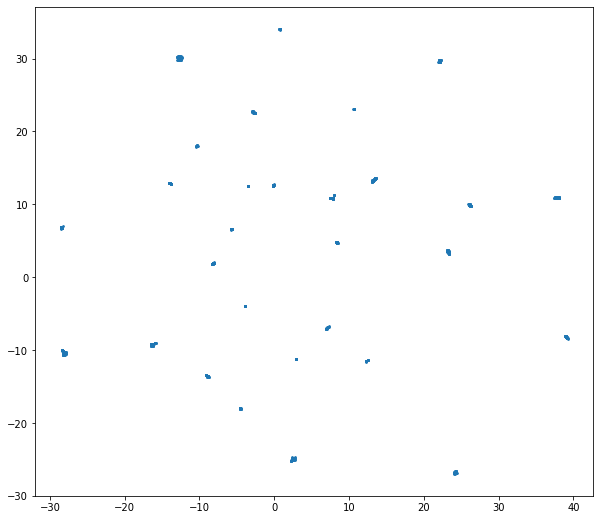

In [ ]:
import umap

cluster_embedding = umap.UMAP(n_neighbors=30, min_dist=0.0,
                              n_components=2, random_state=42).fit_transform(XX)

plt.figure(figsize=(10,9))
plt.scatter(cluster_embedding[:, 0], cluster_embedding[:, 1], s=3, cmap='Spectral')

### Using Bert by NLU (optional)

In [ ]:
import os
! apt-get update -qq   
# Install java
! apt-get install -y openjdk-8-jdk-headless -qq
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["PATH"] = os.environ["JAVA_HOME"] + "/bin:" + os.environ["PATH"]
! pip install nlu pyspark==2.4.7

In [ ]:
import nlu
pipe = nlu.load('embed_sentence.bert')

sent_small_bert_L2_128 download started this may take some time.
Approximate size to download 16.1 MB
[OK!]
sentence_detector_dl download started this may take some time.
Approximate size to download 354.6 KB
[OK!]


In [ ]:
pred = pipe.predict('He was suprised by the diversity of NLU', get_embeddings=True)["sentence_embedding_bert"][0][0]
pred

array([-1.07266879,  0.44813076, -0.08997282, -1.22934723, -0.34819031,
       -0.35513347, -0.27152854, -0.23227897, -1.23862767, -0.30800727,
        0.66234958,  0.80233884, -0.87126923, -0.03766751,  1.13723159,
       -0.23964728, -0.43248701, -0.17714661, -0.96398163,  0.64077461,
        0.03131897, -0.57029307,  1.17667401,  1.17539525,  1.32364714,
       -0.25392845, -0.17340374,  0.58331007,  0.2067398 ,  0.29424369,
       -0.62437445, -1.04207337, -0.71939939,  0.22034067,  0.76555949,
       -1.10191262,  0.36127976, -0.26767296, -2.37760925, -0.57386887,
       -0.53974164, -0.51796782,  0.3413201 , -1.46472907,  0.27658632,
       -1.82926631,  0.30563128,  0.19905542,  0.09541227,  0.31613505,
       -0.15442148,  0.68958461,  0.32292399, -0.52769029, -0.75439483,
       -0.59593201,  0.10311596,  0.8463974 , -0.19463652,  1.73816383,
       -0.04305067, -0.76162755, -0.17146318, -1.34032941, -0.10198724,
       -0.13593055,  0.35786694,  0.89213169, -0.65391839, -1.09

In [ ]:
# SO LONG TIME! SKIP

acc_names = []
acc_encods = []

for idx in tqdm(range(0,len(df_clean[['text_clean']].iloc[0:10000]))):
#for idx in tqdm(range(0,len(df_clean[['text_clean']]))):
  text_tmp = df_clean[['text_clean']].values[idx][0]
  text_encoded_tmp = pipe.predict(text_tmp, get_embeddings=True)["sentence_embedding_bert"][0][0]
  acc_names.append(text_tmp)
  acc_encods.append(text_encoded_tmp)

  0%|          | 28/10000 [00:24<2:27:55,  1.12it/s]


KeyboardInterrupt: ignored

In [ ]:
# We must set output level to sentence since NLU will infer a different output level for this pipeline composition
predictions = pipe.predict(df_clean[['text_clean']].iloc[0:10000], output_level='sentence', get_embeddings=True)
predictions

,sentence,sentence_embedding_bert,text
0,daily thedailywhat,"[-1.694246768951416, 0.164327934384346, -0.33361899852752686, -2.5367610454559326, 0.6079092025756836, 0.05457412824034691, -1.0849202871322632, 0.9125131368637085, -1.145230770111084, 0.2672214210033417, 1.3794814348220825, -0.09815995395183563, -0.773765504360199, 0.4119054675102234, 0.8109678626060486, -0.9479488134384155, -0.677277147769928, -0.1267019361257553, -1.9967316389083862, 0.8382635116577148, -0.47781410813331604, -0.46746599674224854, 0.4107276201248169, 1.243177890777588, 0.7622230648994446, -0.00309695303440094, 0.5128440856933594, 1.852549433708191, -0.2758978009223938, -0.37080317735671997, -0.7911601662635803, -1.280380129814148, -1.6429826021194458, 0.5906834602355957, 0.2912704050540924, -0.32266250252723694, 0.43958160281181335, -0.42457640171051025, -2.607677698135376, -0.6027230620384216, 0.8084020018577576, -0.299295037984848, 1.1316651105880737, -2.0636749267578125, 0.02273966744542122, -0.9979503154754639, -0.903567910194397, -0.11540030688047409, 0.9301072955131531, 0.04958629235625267, 0.11640488356351852, 0.05884005129337311, 0.2216009944677353, 0.45388737320899963, -0.1999133974313736, -0.19099074602127075, 0.7831946015357971, 0.9253324270248413, -0.3815946578979492, 1.7751407623291016, 0.4679293632507324, -0.47744110226631165, -0.7708944082260132, -0.5685198903083801, -0.41661337018013, -0.25047197937965393, -0.004261993803083897, 0.2903860807418823, 0.6971442699432373, 0.10366198420524597, 0.27853989601135254, 0.4599321186542511, -1.3982433080673218, -1.336222529411316, -1.1938343048095703, -0.22057047486305237, 0.3363507390022278, 0.23814311623573303, 1.0497746467590332, 1.0682768821716309, 0.5868152976036072, -0.4433538615703583, -0.3287837505340576, 0.17711852490901947, 0.16408449411392212, -0.05204625427722931, -1.6044632196426392, 0.3221489191055298, 1.319659948348999, -1.5343196392059326, 1.4057873487472534, -0.17767417430877686, -1.9251655340194702, 1.1602882146835327, 0.792690098285675, 1.5877090692520142, 0.5285637974739075, 0.35666894912719727, -0.4775623083114624, 0.3934575319290161, ...]",daily thedailywhat
1,percentage web visits mobile phone usa world advanced telecom services,"[-0.3920096457004547, -0.2904348373413086, -0.8377817273139954, -1.0434613227844238, 1.1875876188278198, 0.8638538122177124, -0.7123508453369141, 1.8540325164794922, -1.1945046186447144, 0.29291486740112305, 0.11874062567949295, 0.38974297046661377, 0.5479817390441895, -0.2126137763261795, 0.617753267288208, -1.5520637035369873, -0.5188099145889282, -0.11387515068054199, -2.085153102874756, 0.9729995727539062, 0.18502198159694672, 0.2937507927417755, 1.208658218383789, 1.1549898386001587, 1.6746864318847656, -0.6059906482696533, -0.11220873147249222, 1.6717842817306519, -0.8001502752304077, 0.24018985033035278, -0.7997821569442749, -1.8835543394088745, -0.46928510069847107, -0.9512798190116882, 0.5127514004707336, 0.029183905571699142, -0.6673275828361511, -1.368110179901123, -2.5660555362701416, -0.9334968328475952, 0.7958850860595703, 1.6336725950241089, 0.25868546962738037, -1.3217321634292603, 0.9553359746932983, -1.4751999378204346, -1.447784662246704, -0.7692428827285767, 0.25495603680610657, -0.28179559111595154, 0.4636261761188507, 1.3496800661087036, -0.001111731631681323, 0.009107395075261593, -0.23097491264343262, 0.1613226979970932, 0.6354672908782959, 0.3411608934402466, 0.11744856089353561, 0.7907922267913818, 1.2683075666427612, 0.364698201417923, -2.2229323387145996, -1.4602621793746948, -0.6060633063316345, 0.2760081887245178, 0.06477706879377365, 0.8173414468765259, -0.9167197942733765, -0.5644048452377319, -0.23868651688098907, 1.999748945236206, -0.4526538550853729, -0.059235360473394394, -0.7859950661659241, 0.007706454023718834, 0.026903415098786354, -0.40437763929367065, 0.7832263708114624, 1.014950156211853, -0.40139925479888916, -0.9502467513084412, 0.3551613986492157, 0.3481108844280243, -0.7773331999778748, -0.001446442

In [ ]:
predictions.isnull().sum()

sentence                   27
sentence_embedding_bert    27
text                        0
dtype: int64

In [ ]:
predictions.dropna(inplace=True)

In [ ]:
predictions.isnull().sum()

sentence                   0
sentence_embedding_bert    0
text                       0
dtype: int64

In [ ]:
len(predictions.iloc[0]["sentence_embedding_bert"])

128

In [ ]:
predictions.shape

(9973, 3)

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np
# put all sentence embeddings in a matrix
e_col = 'sentence_embedding_bert'
embed_mat = np.array([x for x in predictions[e_col]])
# calculate distance between every embedding pair
sentence_id = 51
print("Similarities for Sentence : " + predictions.iloc[sentence_id].sentence)
sim_mat = cosine_similarity(predictions[e_col].iloc[sentence_id].reshape(1, 128),embed_mat)
# write sim scores to df
predictions['sim_score'] = sim_mat[0]
predictions.sort_values('sim_score', ascending = False)

Similarities for Sentence : amazon usa eagerly awaited sophomore album british singersongwriter adele


,sentence,sentence_embedding_bert,text,sim_score
51,amazon usa eagerly awaited sophomore album british singersongwriter adele,"[-0.9789806008338928, -0.13750100135803223, 0.2756112813949585, -1.9239184856414795, 0.25375303626060486, 0.09376173466444016, 0.47594377398490906, 0.4451608657836914, -1.999578833580017, 0.2456059455871582, 1.0575296878814697, 0.011536920443177223, -0.8488901257514954, 0.2814970314502716, 0.9390335083007812, -0.8081462383270264, 0.005660349503159523, -0.21801218390464783, -1.321088194847107, 0.6614813804626465, -0.28758418560028076, -0.3096698522567749, 1.052281379699707, 1.1161434650421143, 0.934648334980011, -0.8093544244766235, -0.23243258893489838, 0.3160521686077118, -0.02680833823978901, 0.06128787621855736, -0.6054381728172302, -0.4669373333454132, -1.739385962486267, -0.4813280999660492, 1.41179358959198, -0.49723103642463684, -0.6011915802955627, -0.6204299330711365, -4.368917942047119, -0.7509004473686218, 0.8644605875015259, -0.29619115591049194, 0.8054007887840271, -1.9527965784072876, 0.13258686661720276, -1.3639304637908936, -0.13114939630031586, -0.25866153836250305, 0.06968478858470917, -0.612628161907196, 1.3530738353729248, 0.37410232424736023, 0.21949902176856995, -0.07781444489955902, -0.19817109405994415, 0.22364148497581482, -0.6086609363555908, 0.8089338541030884, 0.3165139853954315, 1.7223715782165527, -0.6531084179878235, 0.14023222029209137, -1.390305995941162, -2.214660406112671, -0.9711799621582031, 0.1560470014810562, -0.945117712020874, 0.6265906691551208, -0.3109123110771179, 0.584709107875824, 0.09951736778020859, 0.2202650010585785, -0.23644967377185822, -0.3218245208263397, -0.790340006351471, -1.3666422367095947, -0.18463808298110962, 0.629253089427948, 1.8316527605056763, 1.0085426568984985, 1.4418513774871826, -1.0702961683273315, 0.04798620566725731, 0.5057125091552734, 0.9048565030097961, 0.28820446133613586, -1.1545323133468628, -0.4242362976074219, 1.8626233339309692, -0.4350324869155884, 1.5705264806747437, 1.5635669231414795, -0.9542641043663025, 1.3532967567443848, 1.221795916557312, 0.7278611660003662, 0.4381384551525116, 0.6019060015678406, 0.8545287847518921, 0.45677292346954346, ...]",amazon usa eagerly awaited sophomore album british singersongwriter adele,1.000000
2035,funkmasterflex ifwt madonna said michelle obama,"[-0.951055645942688, 0.45779314637184143, -0.019087616354227066, -1.6287548542022705, 0.0367465540766716, 0.7955693006515503, 0.38306695222854614, 0.2903837561607361, -0.9747899770736694, -0.034945014864206314, 0.8163753747940063, 0.2156166136264801, -0.7094751596450806, -0.3439454138278961, 1.0338208675384521, -1.1284514665603638, -1.0234401226043701, -0.0735754519701004, -0.9748238325119019, 1.269913673400879, 0.11946966499090195, -0.031464241445064545, 0.8790066838264465, 0.5188397765159607, 1.6580995321273804, -0.8393353223800659, 0.6741492748260498, -0.01112736202776432, -0.13535869121551514, -0.6745036840438843, -0.9061417579650879, -0.6975628137588501, -1.058418869972229, -0.1127311959862709, 1.2762346267700195, -0.5650273561477661, -0.48753780126571655, -0.01811946928501129, -3.2785580158233643, -0.777652382850647, 1.0878567695617676, -0.8515828251838684, 0.42588743567466736, -1.4137866497039795, 0.7562580704689026, -1.2973488569259644, 0.39687493443489075, -0.5025228261947632, -0.11361178010702133, -0.7907418012619019, 1.2676112651824951, 0.655802309513092, 0.051732420921325684, -0.11507289111614227, 0.06668688356876373, -0.154972106218338, -0.34786009788513184, 0.3240478038787842, 0.20784802734851837, 1.8524048328399658, 0.30822068452835083, 0.001880992902442813, -0.4801037311553955, -0.3418353796005249, -0.6880909204483032, 0.12534329295158386, -0.8720775842666626, 0.14352217316627502, -1.519696831703186, -0.20576879382133484, -0.14282336831092834, -0.3103557229042053, 0.15235775709152222, -1.2361714839935303, -1.1909841299057007, -0.5379830002784729, 0.46033644676208496, 0.30382731556892395, 1.9014701843261719, 0.37774267792701

In [ ]:
XX = np.stack( predictions["sentence_embedding_bert"].values, axis=0 )

In [ ]:
XX.shape

(9973, 128)

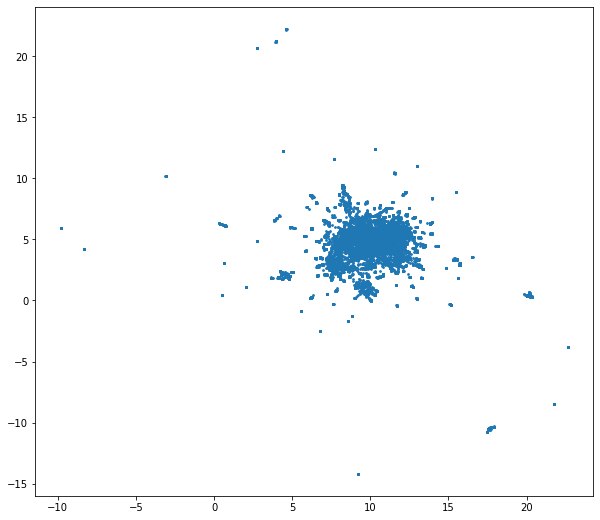

In [ ]:
import umap

cluster_embedding = umap.UMAP(n_neighbors=30, min_dist=0.0,
                              n_components=2, random_state=42).fit_transform(XX)

plt.figure(figsize=(10,9))
plt.scatter(cluster_embedding[:, 0], cluster_embedding[:, 1], s=3, cmap='Spectral')